In [1]:
# Use to get any item from your google drive
from google.colab import drive
drive.mount('/content/drive')
![[ ! -f 490data.tar.gz ]] && cp /content/drive/My\ Drive/490data.tar.gz .
![[ ! -d data ]] && rm -rf ./data
!mkdir -p data
!tar -xvzf 490data.tar.gz -C .
!rm 490data.tar.gz

Mounted at /content/drive
./data/
./data/yfcc_geocell_collection_new.npy
./data/geocells/
./data/geocells/admin_1.geojson_compressed_2.5.geojson
./data/geocells/countries.geojson_compressed_2.5.geojson
./data/geocells/admin_1.geojson
./data/geocells/countries.geojson
./data/geocells/admin_2.geojson_compressed_2.5.geojson
./data/geocells/admin_2.geojson
./data/geocells_yfcc.csv


In [2]:
# This is supposed to make sure if you edit .py files
# colab will pick up on it
%load_ext autoreload
%autoreload 2

In [3]:
!if [[ ! -d PROJECT ]] && [[ ! -d PIGEON ]]; then git clone https://github.com/iggy2k/CSC490-Project-Winter-2025.git PROJECT; fi

Cloning into 'PROJECT'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 443 (delta 44), reused 67 (delta 25), pack-reused 352 (from 1)
Receiving objects: 100% (443/443), 29.62 MiB | 16.86 MiB/s, done.
Resolving deltas: 100% (214/214), done.


In [4]:
import yaml
from tqdm.notebook import tqdm
import subprocess


with open("./PROJECT/environment.yaml") as file_handle:
    environment_data = yaml.safe_load(file_handle)

for dependency in tqdm(environment_data["dependencies"], total=len(environment_data["dependencies"])):
    if isinstance(dependency, dict):
      for lib in tqdm(dependency['pip'], total=len(dependency['pip'])):
        try:
            out = subprocess.check_output(f'pip install {lib.split("=")[0]}', shell=True)
        except subprocess.CalledProcessError as err:
            print(err)
    else:
      try:
          subprocess.check_output(f'pip install {dependency.split("=")[0]}', shell=True)
      except subprocess.CalledProcessError as err:
          print(err)
try:
  subprocess.check_output('pip install pycountry global_land_mask', shell=True)
except subprocess.CalledProcessError as err:
  print(err)

  0%|          | 0/26 [00:00<?, ?it/s]

Command 'pip install matplotlib-base' returned non-zero exit status 1.
Command 'pip install python' returned non-zero exit status 1.
Command 'pip install pytorch' returned non-zero exit status 1.


  0%|          | 0/18 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('./PROJECT'))

from modules.dataset import ImageCoordinateDataset, download_osv5m_dataset, extract_zip_files
download_osv5m_dataset()

In [ ]:
extract_zip_files()

In [ ]:
import torch
import torchvision.transforms as transforms
mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)
normalize = transforms.Normalize(mean.tolist(), std.tolist())

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

In [ ]:
BATCH_SIZE = 32
MAX_ITEMS = 10000

In [ ]:
train_dataset = ImageCoordinateDataset(csv_file='datasets/osv5m/train.csv', image_dirs=[
                                      'datasets/osv5m/images/train/00',
                                      ],\
                                 transform=transform)
val_dataset = ImageCoordinateDataset(csv_file='datasets/osv5m/test.csv', image_dirs=[
                                      'datasets/osv5m/images/test/00',
                                      ],\
                                 transform=transform)

Reading datasets/osv5m/images/train/00
Found 50000 files.


Loading data: 0it [00:00, ?it/s]

Found 4894684 csv entries.


Processing files:   0%|          | 0/50000 [00:00<?, ?it/s]

Keeping 10000 items
Dataset ready, 10000 files.
Skipped 0 non-land files.
Reading datasets/osv5m/images/test/00
Found 50000 files.


Loading data: 0it [00:00, ?it/s]

Found 210122 csv entries.


Processing files:   0%|          | 0/50000 [00:00<?, ?it/s]

Keeping 10000 items
Dataset ready, 10000 files.
Skipped 0 non-land files.


In [ ]:
# Create dataloaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print('using cuda')
else:
  device = torch.device("cpu")
  print('using cpu')

using cuda


In [ ]:
CLIP_MODEL = 'openai/clip-vit-base-patch32'

In [ ]:
# !pip install -q git+https://github.com/openai/CLIP.git

In [ ]:
!mkdir -p data/geocells/
# Political boundaries (admin0 = country)
![ ! -f data/geocells/admin_2.geojson ] && wget --show-progress -O data/geocells/admin_2.geojson -q https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM2.geojson
![ ! -f data/geocells/admin_1.geojson ] && wget --show-progress -O data/geocells/admin_1.geojson -q https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.geojson
![ ! -f data/geocells/countries.geojson ] && wget --show-progress -O data/geocells/countries.geojson -q https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.geojson

In [ ]:
!pip install -q geojson

In [ ]:
from modules.geocell import hook, simplify_geojson

In [ ]:
import os
import sys

# Local
if os.path.isdir('PIGEON/'):
    PIGEON_DIR = 'PIGEON/'
# Git clone when colab
else:
    PIGEON_DIR = 'PROJECT/PIGEON/'

os.environ["PIGEON_DIR"] = PIGEON_DIR
sys.path.insert(1, PIGEON_DIR)

In [ ]:
from pathlib import Path

SIMPLIFY_GEOJSON = True

if SIMPLIFY_GEOJSON:
    print('Simplifying geojson file for faster geocell gen...')

    new_admin1 = simplify_geojson('data/geocells/admin_1.geojson', 2.5)
    new_admin2 = simplify_geojson('data/geocells/admin_2.geojson', 2.5)
    new_countries = simplify_geojson('data/geocells/countries.geojson', 2.5)

    COUNTRY_PATH = 'data/geocells/countries.geojson_compressed_2.5.geojson'
    ADMIN_1_PATH = 'data/geocells/admin_1.geojson_compressed_2.5.geojson'
    ADMIN_2_PATH = 'data/geocells/admin_2.geojson_compressed_2.5.geojson'

    print('New geojson files:', COUNTRY_PATH, ADMIN_1_PATH, ADMIN_2_PATH)

Simplifying geojson file for faster geocell gen...
data/geocells/admin_1.geojson_compressed_2.5.geojson alredy exists, skipping...
data/geocells/admin_2.geojson_compressed_2.5.geojson alredy exists, skipping...
data/geocells/countries.geojson_compressed_2.5.geojson alredy exists, skipping...
New geojson files: data/geocells/countries.geojson_compressed_2.5.geojson data/geocells/admin_1.geojson_compressed_2.5.geojson data/geocells/admin_2.geojson_compressed_2.5.geojson


In [ ]:
# TODO: pre-generate all this, add to the repo and add option to load instead
import sys
sys.path.append(f'{PIGEON_DIR}/dataset_creation/geocell')
sys.path.append(PIGEON_DIR)

from geocell_creation import *

GEOCELL_PATH = 'data/geocells_yfcc.csv'
df = train_dataset.df
geocells_file = Path(GEOCELL_PATH)
if not geocells_file.is_file():
    geocell_creator = GeocellCreator(df, GEOCELL_PATH)
    geocells = geocell_creator.generate()
else:
  print('Loading existing geocells')

Loading existing geocells


In [ ]:
# Use to load anything to your google drive
from google.colab import drive
drive.mount('/content/drive')
!tar -zcf 490data.tar.gz ./data
!cp 490data.tar.gz /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q huggingface-hub transformers pygeos
!pip install -q -U dill datasets

In [ ]:
from accelerate import Accelerator
accelerator = Accelerator()

In [ ]:
from modules.model import GeoLocationModel

In [ ]:
from modules.loss import HaversineLoss

In [ ]:
import torch.optim as optim

from torch.optim.lr_scheduler import ExponentialLR

haversineLoss = HaversineLoss()
# mseLoss = nn.MSELoss()
# ceLoss = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.001)
scheduler = ExponentialLR(optimizer, gamma=0.8)

In [ ]:
!pip install -q livelossplot

In [ ]:
from livelossplot import PlotLosses

In [ ]:
from ipywidgets import Output
OUTPUT_CONTEXT = Output()
display(OUTPUT_CONTEXT)

Output()

In [ ]:
# Clean-up if re-running
model = GeoLocationModel()
torch.cuda.empty_cache()

In [ ]:
from modules.train import train_model
from accelerate import Accelerator

# Initialize necessary components
accelerator = Accelerator()

# Call the function
avg_epoch_loss = train_model(
    model=model,
    optimizer=optimizer,
    train_dataloader=train_dataloader,
    accelerator=accelerator,
    scheduler=scheduler,
    num_epochs=1,
    haversineLoss=haversineLoss,
    OUTPUT_CONTEXT=OUTPUT_CONTEXT
)

Setting figsize to (10, 5)


Epoch 1 progress:   0%|          | 0/313 [00:00<?, ?it/s]

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Loss: 0.70156;                         
Out: [63.04728157414365, -0.45727959292319964]                        
Expected: [31.7913875579834, -0.7147689461708069]



Epoch 1 progress:   0%|          | 1/313 [00:00<04:45,  1.09it/s]

Epochs:   0%|          | 0/1 [00:01<?, ?it/s]

Loss: 0.76203;                         
Out: [46.76443204638373, -4.123494382329932]                        
Expected: [28.410388946533203, 1.1533751487731934]



Epoch 1 progress:   1%|          | 2/313 [00:01<04:45,  1.09it/s]

Epochs:   0%|          | 0/1 [00:02<?, ?it/s]

Loss: 0.84570;                         
Out: [76.75341825892313, -13.736748558367491]                        
Expected: [33.112945556640625, -0.9284816980361938]



Epoch 1 progress:   1%|          | 3/313 [00:02<04:42,  1.10it/s]

Epochs:   0%|          | 0/1 [00:03<?, ?it/s]

Loss: 0.87641;                         
Out: [61.903805952395984, -3.0526732145403326]                        
Expected: [33.712303161621094, -9.531219482421875]



Epoch 1 progress:   1%|▏         | 4/313 [00:03<04:37,  1.11it/s]

Epochs:   0%|          | 0/1 [00:04<?, ?it/s]

Loss: 0.75511;                         
Out: [48.18988387952016, -11.985300461520989]                        
Expected: [25.56134033203125, -14.139344215393066]



Epoch 1 progress:   2%|▏         | 5/313 [00:04<04:35,  1.12it/s]

Epochs:   0%|          | 0/1 [00:05<?, ?it/s]

Loss: 0.71957;                         
Out: [19.046826301147004, -33.743645387908]                        
Expected: [32.40460968017578, -13.217987060546875]



Epoch 1 progress:   2%|▏         | 6/313 [00:05<04:33,  1.12it/s]

Epochs:   0%|          | 0/1 [00:05<?, ?it/s]

Loss: 0.76175;                         
Out: [56.75816565453142, -14.731944511817435]                        
Expected: [34.92744827270508, -16.089738845825195]



Epoch 1 progress:   2%|▏         | 7/313 [00:06<04:32,  1.12it/s]

Epochs:   0%|          | 0/1 [00:06<?, ?it/s]

Loss: 0.80226;                         
Out: [35.33746121700328, -7.865334386076321]                        
Expected: [32.29550552368164, 6.171658515930176]



Epoch 1 progress:   3%|▎         | 8/313 [00:07<04:32,  1.12it/s]

Epochs:   0%|          | 0/1 [00:07<?, ?it/s]

Loss: 0.82109;                         
Out: [46.76443204638374, -4.123494382329931]                        
Expected: [20.857402801513672, -19.92739486694336]



Epoch 1 progress:   3%|▎         | 9/313 [00:08<04:31,  1.12it/s]

Epochs:   0%|          | 0/1 [00:08<?, ?it/s]

Loss: 0.84240;                         
Out: [114.16721062472611, -28.69204040631863]                        
Expected: [30.236244201660156, 2.743030071258545]



Epoch 1 progress:   3%|▎         | 10/313 [00:08<04:30,  1.12it/s]

Epochs:   0%|          | 0/1 [00:09<?, ?it/s]

Loss: 0.76480;                         
Out: [75.89970423666054, -4.577245668367869]                        
Expected: [41.455406188964844, -12.562302589416504]



Epoch 1 progress:   4%|▎         | 11/313 [00:09<04:27,  1.13it/s]

Epochs:   0%|          | 0/1 [00:10<?, ?it/s]

Loss: 0.73177;                         
Out: [45.910718024121145, 5.036008507669693]                        
Expected: [36.43885803222656, -17.92447853088379]



Epoch 1 progress:   4%|▍         | 12/313 [00:10<04:29,  1.12it/s]

Epochs:   0%|          | 0/1 [00:11<?, ?it/s]

Loss: 0.79802;                         
Out: [32.76853376211916, -2.5989219285023957]                        
Expected: [33.51298522949219, 7.118841648101807]



Epoch 1 progress:   4%|▍         | 13/313 [00:11<04:33,  1.10it/s]

Epochs:   0%|          | 0/1 [00:12<?, ?it/s]

Loss: 0.67570;                         
Out: [55.90445163226883, -5.57244162181781]                        
Expected: [38.53860092163086, 4.7411699295043945]



Epoch 1 progress:   4%|▍         | 14/313 [00:12<04:34,  1.09it/s]

Epochs:   0%|          | 0/1 [00:13<?, ?it/s]

Loss: 0.83597;                         
Out: [48.47964547900526, -0.23040394990423052]                        
Expected: [38.740882873535156, -8.979668617248535]



Epoch 1 progress:   5%|▍         | 15/313 [00:13<04:30,  1.10it/s]

Epochs:   0%|          | 0/1 [00:14<?, ?it/s]

Loss: 0.84521;                         
Out: [37.984752669062395, -13.962828262437721]                        
Expected: [35.65491485595703, -10.738226890563965]



Epoch 1 progress:   5%|▌         | 16/313 [00:14<04:29,  1.10it/s]

Epochs:   0%|          | 0/1 [00:15<?, ?it/s]

Loss: 0.67954;                         
Out: [50.194858911626774, 3.6626864825214693]                        
Expected: [33.817298889160156, -10.69080924987793]



Epoch 1 progress:   5%|▌         | 17/313 [00:15<04:29,  1.10it/s]

Epochs:   0%|          | 0/1 [00:15<?, ?it/s]

Loss: 0.85697;                         
Out: [104.74521482745227, -16.78589346602256]                        
Expected: [36.081268310546875, -18.77475357055664]



Epoch 1 progress:   6%|▌         | 18/313 [00:16<04:29,  1.10it/s]

Epochs:   0%|          | 0/1 [00:16<?, ?it/s]

Loss: 0.78663;                         
Out: [82.18103476817643, -12.514676961898582]                        
Expected: [38.95720672607422, -6.886224746704102]



Epoch 1 progress:   6%|▌         | 19/313 [00:17<04:28,  1.09it/s]

Epochs:   0%|          | 0/1 [00:17<?, ?it/s]

Loss: 0.82291;                         
Out: [62.475543763269826, -1.7549764037317657]                        
Expected: [35.93216323852539, -9.41962718963623]



Epoch 1 progress:   6%|▋         | 20/313 [00:18<04:27,  1.10it/s]

Epochs:   0%|          | 0/1 [00:18<?, ?it/s]

Loss: 0.77831;                         
Out: [58.1914028757642, -0.3816543785835431]                        
Expected: [38.69767761230469, -17.617130279541016]



Epoch 1 progress:   7%|▋         | 21/313 [00:19<04:28,  1.09it/s]

Epochs:   0%|          | 0/1 [00:19<?, ?it/s]

Loss: 0.77725;                         
Out: [76.8163778135457, 0.5289994929490709]                        
Expected: [42.19286346435547, -11.133291244506836]



Epoch 1 progress:   7%|▋         | 22/313 [00:19<04:24,  1.10it/s]

Epochs:   0%|          | 0/1 [00:20<?, ?it/s]

Loss: 0.80008;                         
Out: [48.77769702515283, 11.5420998450499]                        
Expected: [36.60523986816406, -13.979206085205078]



Epoch 1 progress:   7%|▋         | 23/313 [00:20<04:24,  1.10it/s]

Epochs:   0%|          | 0/1 [00:21<?, ?it/s]

Loss: 0.81803;                         
Out: [90.17757873231386, -16.559017823003593]                        
Expected: [33.95647430419922, 5.560428142547607]



Epoch 1 progress:   8%|▊         | 24/313 [00:21<04:22,  1.10it/s]

Epochs:   0%|          | 0/1 [00:22<?, ?it/s]

Loss: 0.77449;                         
Out: [58.1914028757642, -0.3816543785835427]                        
Expected: [31.140039443969727, 16.816043853759766]



Epoch 1 progress:   8%|▊         | 25/313 [00:22<04:21,  1.10it/s]

Epochs:   0%|          | 0/1 [00:23<?, ?it/s]

Loss: 0.80256;                         
Out: [83.03474879043904, -21.674179851898206]                        
Expected: [31.621864318847656, 25.175804138183594]



Epoch 1 progress:   8%|▊         | 26/313 [00:23<04:22,  1.09it/s]

Epochs:   0%|          | 0/1 [00:24<?, ?it/s]

Loss: 0.71657;                         
Out: [83.60648660131287, -20.376483041089635]                        
Expected: [34.17866516113281, -28.09145164489746]



Epoch 1 progress:   9%|▊         | 27/313 [00:24<04:21,  1.09it/s]

Epochs:   0%|          | 0/1 [00:25<?, ?it/s]

Loss: 0.74371;                         
Out: [132.4472497964963, -31.589934885294387]                        
Expected: [32.034629821777344, -3.329103946685791]



Epoch 1 progress:   9%|▉         | 28/313 [00:25<04:18,  1.10it/s]

Epochs:   0%|          | 0/1 [00:25<?, ?it/s]

Loss: 0.79833;                         
Out: [58.76314068663804, 0.9160424322250234]                        
Expected: [34.767704010009766, -1.5638961791992188]



Epoch 1 progress:   9%|▉         | 29/313 [00:26<04:15,  1.11it/s]

Epochs:   0%|          | 0/1 [00:26<?, ?it/s]

Loss: 0.80306;                         
Out: [33.340271572993004, -1.3012251176938296]                        
Expected: [34.718631744384766, -18.4636173248291]



Epoch 1 progress:  10%|▉         | 30/313 [00:27<04:15,  1.11it/s]

Epochs:   0%|          | 0/1 [00:27<?, ?it/s]

Loss: 0.75681;                         
Out: [87.0369134665559, -12.590302176238238]                        
Expected: [30.383129119873047, 12.1044340133667]



Epoch 1 progress:  10%|▉         | 31/313 [00:28<04:16,  1.10it/s]

Epochs:   0%|          | 0/1 [00:28<?, ?it/s]

Loss: 0.79443;                         
Out: [61.98216994957098, -3.88375463332781]                        
Expected: [30.311365127563477, 1.4177649021148682]



Epoch 1 progress:  10%|█         | 32/313 [00:29<05:06,  1.09s/it]

Epochs:   0%|          | 0/1 [00:30<?, ?it/s]

Loss: 0.76393;                         
Out: [50.19485891162677, 3.6626864825214698]                        
Expected: [33.53092956542969, -18.478343963623047]



Epoch 1 progress:  11%|█         | 33/313 [00:30<04:48,  1.03s/it]

Epochs:   0%|          | 0/1 [00:31<?, ?it/s]

Loss: 0.78606;                         
Out: [19.046826301147004, -33.743645387908]                        
Expected: [39.84673309326172, -22.05126953125]



Epoch 1 progress:  11%|█         | 34/313 [00:31<04:37,  1.00it/s]

Epochs:   0%|          | 0/1 [00:31<?, ?it/s]

Loss: 0.82220;                         
Out: [33.050509973507914, -13.056121629310589]                        
Expected: [37.827823638916016, 0.9570887088775635]



Epoch 1 progress:  11%|█         | 35/313 [00:32<04:29,  1.03it/s]

Epochs:   0%|          | 0/1 [00:32<?, ?it/s]

Loss: 0.77146;                         
Out: [36.19117523926586, -17.024837276075942]                        
Expected: [41.57404708862305, -24.539167404174805]



Epoch 1 progress:  12%|█▏        | 36/313 [00:33<04:25,  1.04it/s]

Epochs:   0%|          | 0/1 [00:33<?, ?it/s]

Loss: 0.74838;                         
Out: [39.491788425874844, -30.60109444944828]                        
Expected: [29.89287757873535, -3.323336601257324]



Epoch 1 progress:  12%|█▏        | 37/313 [00:34<04:21,  1.06it/s]

Epochs:   0%|          | 0/1 [00:34<?, ?it/s]

Loss: 0.71226;                         
Out: [48.471860090908905, -22.44250016232918]                        
Expected: [34.91435241699219, -0.5141873359680176]



Epoch 1 progress:  12%|█▏        | 38/313 [00:35<04:19,  1.06it/s]

Epochs:   0%|          | 0/1 [00:35<?, ?it/s]

Loss: 0.87929;                         
Out: [82.75277257905027, -11.216980151090013]                        
Expected: [36.114234924316406, 0.16858577728271484]



Epoch 1 progress:  12%|█▏        | 39/313 [00:36<04:18,  1.06it/s]

Epochs:   0%|          | 0/1 [00:36<?, ?it/s]

Loss: 0.86363;                         
Out: [44.76724240237347, 2.4406148860525594]                        
Expected: [40.41944885253906, 7.5718255043029785]



Epoch 1 progress:  13%|█▎        | 40/313 [00:36<04:17,  1.06it/s]

Epochs:   0%|          | 0/1 [00:37<?, ?it/s]

Loss: 0.81529;                         
Out: [41.626577136615516, 6.409330532817916]                        
Expected: [28.046920776367188, -11.450052261352539]



Epoch 1 progress:  13%|█▎        | 41/313 [00:37<04:15,  1.07it/s]

Epochs:   0%|          | 0/1 [00:38<?, ?it/s]

Loss: 0.81750;                         
Out: [37.34243624910989, 7.782652557966139]                        
Expected: [36.22837829589844, -1.4735217094421387]



Epoch 1 progress:  13%|█▎        | 42/313 [00:38<04:10,  1.08it/s]

Epochs:   0%|          | 0/1 [00:39<?, ?it/s]

Loss: 0.80073;                         
Out: [93.31824399807181, -20.527733469768947]                        
Expected: [24.640628814697266, -22.39348602294922]



Epoch 1 progress:  14%|█▎        | 43/313 [00:39<04:06,  1.09it/s]

Epochs:   0%|          | 0/1 [00:40<?, ?it/s]

Loss: 0.82435;                         
Out: [44.187719203403276, -21.069178137180955]                        
Expected: [34.26372528076172, 22.227928161621094]



Epoch 1 progress:  14%|█▍        | 44/313 [00:40<04:03,  1.10it/s]

Epochs:   0%|          | 0/1 [00:41<?, ?it/s]

Loss: 0.72543;                         
Out: [45.17957535568159, 3.0153069258254295]                        
Expected: [38.12763214111328, -1.3719370365142822]



Epoch 1 progress:  14%|█▍        | 45/313 [00:41<04:01,  1.11it/s]

Epochs:   0%|          | 0/1 [00:42<?, ?it/s]

Loss: 0.80153;                         
Out: [43.623766780625786, -0.15477873556457333]                        
Expected: [39.683048248291016, 2.2090272903442383]



Epoch 1 progress:  15%|█▍        | 46/313 [00:42<03:57,  1.12it/s]

Epochs:   0%|          | 0/1 [00:42<?, ?it/s]

Loss: 0.82745;                         
Out: [41.05483932574168, 5.1116337220093495]                        
Expected: [27.211366653442383, 23.541019439697266]



Epoch 1 progress:  15%|█▌        | 47/313 [00:43<03:56,  1.13it/s]

Epochs:   0%|          | 0/1 [00:43<?, ?it/s]

Loss: 0.77268;                         
Out: [39.33962589312016, 1.2185432895836485]                        
Expected: [33.23935317993164, 13.245455741882324]



Epoch 1 progress:  15%|█▌        | 48/313 [00:44<03:54,  1.13it/s]

Epochs:   0%|          | 0/1 [00:44<?, ?it/s]

Loss: 0.77122;                         
Out: [41.054839325741675, 5.111633722009349]                        
Expected: [28.861522674560547, -9.787300109863281]



Epoch 1 progress:  16%|█▌        | 49/313 [00:44<03:53,  1.13it/s]

Epochs:   0%|          | 0/1 [00:45<?, ?it/s]

Loss: 0.77895;                         
Out: [44.47748080288837, -9.314281625564199]                        
Expected: [21.962024688720703, -2.7772247791290283]



Epoch 1 progress:  16%|█▌        | 50/313 [00:45<03:50,  1.14it/s]

Epochs:   0%|          | 0/1 [00:46<?, ?it/s]

Loss: 0.79558;                         
Out: [119.02308932310558, -28.767665620658285]                        
Expected: [31.227611541748047, -9.56165599822998]



Epoch 1 progress:  16%|█▋        | 51/313 [00:46<03:50,  1.14it/s]

Epochs:   0%|          | 0/1 [00:47<?, ?it/s]

Loss: 0.76120;                         
Out: [19.046826301147004, -33.743645387908]                        
Expected: [41.03607940673828, -8.390732765197754]



Epoch 1 progress:  17%|█▋        | 52/313 [00:47<03:52,  1.12it/s]

Epochs:   0%|          | 0/1 [00:48<?, ?it/s]

Loss: 0.69928;                         
Out: [37.616627072402295, -24.886643355267]                        
Expected: [35.155555725097656, 2.0434746742248535]



Epoch 1 progress:  17%|█▋        | 53/313 [00:48<03:56,  1.10it/s]

Epochs:   0%|          | 0/1 [00:49<?, ?it/s]

Loss: 0.77085;                         
Out: [79.04036950241849, -8.545961315133226]                        
Expected: [31.326202392578125, -0.9574756622314453]



Epoch 1 progress:  17%|█▋        | 54/313 [00:49<03:54,  1.11it/s]

Epochs:   0%|          | 0/1 [00:50<?, ?it/s]

Loss: 0.68055;                         
Out: [26.189656243021833, -28.62848335901339]                        
Expected: [29.138347625732422, 5.531455993652344]



Epoch 1 progress:  18%|█▊        | 55/313 [00:50<03:52,  1.11it/s]

Epochs:   0%|          | 0/1 [00:50<?, ?it/s]

Loss: 0.74074;                         
Out: [79.89408352468108, -17.70546420513285]                        
Expected: [34.25436782836914, -19.62808609008789]



Epoch 1 progress:  18%|█▊        | 56/313 [00:51<03:50,  1.11it/s]

Epochs:   0%|          | 0/1 [00:51<?, ?it/s]

Loss: 0.75553;                         
Out: [38.196150271372474, -1.3768503320334857]                        
Expected: [25.353857040405273, 10.690831184387207]



Epoch 1 progress:  18%|█▊        | 57/313 [00:52<03:49,  1.12it/s]

Epochs:   0%|          | 0/1 [00:52<?, ?it/s]

Loss: 0.89856;                         
Out: [77.03539447031187, -24.19394825917568]                        
Expected: [33.00658416748047, -11.974773406982422]



Epoch 1 progress:  19%|█▊        | 58/313 [00:53<03:46,  1.13it/s]

Epochs:   0%|          | 0/1 [00:53<?, ?it/s]

Loss: 0.80910;                         
Out: [58.1914028757642, -0.38165437858354356]                        
Expected: [29.56505012512207, -1.6459455490112305]



Epoch 1 progress:  19%|█▉        | 59/313 [00:53<03:43,  1.13it/s]

Epochs:   0%|          | 0/1 [00:54<?, ?it/s]

Loss: 0.83588;                         
Out: [98.74586050732512, -19.30566187330004]                        
Expected: [31.04693603515625, -16.55593490600586]



Epoch 1 progress:  19%|█▉        | 60/313 [00:54<03:42,  1.14it/s]

Epochs:   0%|          | 0/1 [00:55<?, ?it/s]

Loss: 0.78374;                         
Out: [147.0932498888097, -32.64789194710084]                        
Expected: [26.314014434814453, -4.210319519042969]



Epoch 1 progress:  19%|█▉        | 61/313 [00:55<03:40,  1.14it/s]

Epochs:   0%|          | 0/1 [00:56<?, ?it/s]

Loss: 0.75019;                         
Out: [113.78368058551357, -24.51902602904387]                        
Expected: [37.5101432800293, 0.002790689468383789]



Epoch 1 progress:  20%|█▉        | 62/313 [00:56<03:38,  1.15it/s]

Epochs:   0%|          | 0/1 [00:57<?, ?it/s]

Loss: 0.83763;                         
Out: [50.194858911626774, 3.6626864825214698]                        
Expected: [28.63766860961914, -0.32021093368530273]



Epoch 1 progress:  20%|██        | 63/313 [00:57<03:35,  1.16it/s]

Epochs:   0%|          | 0/1 [00:57<?, ?it/s]

Loss: 0.82825;                         
Out: [49.61533571265659, -19.847106540712044]                        
Expected: [32.499671936035156, -2.8116655349731445]



Epoch 1 progress:  20%|██        | 64/313 [00:58<04:14,  1.02s/it]

Epochs:   0%|          | 0/1 [00:59<?, ?it/s]

Loss: 0.82574;                         
Out: [44.187719203403276, -21.06917813718096]                        
Expected: [33.85541534423828, -3.6593055725097656]



Epoch 1 progress:  21%|██        | 65/313 [00:59<04:06,  1.01it/s]

Epochs:   0%|          | 0/1 [01:00<?, ?it/s]

Loss: 0.86031;                         
Out: [69.9787139137084, -7.928095494432823]                        
Expected: [37.53689956665039, -6.190812587738037]



Epoch 1 progress:  21%|██        | 66/313 [01:00<03:59,  1.03it/s]

Epochs:   0%|          | 0/1 [01:01<?, ?it/s]

Loss: 0.74464;                         
Out: [61.33206814152213, -4.350370025348901]                        
Expected: [29.71038246154785, -2.1059727668762207]



Epoch 1 progress:  21%|██▏       | 67/313 [01:01<03:53,  1.05it/s]

Epochs:   0%|          | 0/1 [01:02<?, ?it/s]

Loss: 0.70551;                         
Out: [30.763558730012555, -18.246908872544854]                        
Expected: [31.574352264404297, 6.163490295410156]



Epoch 1 progress:  22%|██▏       | 68/313 [01:02<03:48,  1.07it/s]

Epochs:   0%|          | 0/1 [01:02<?, ?it/s]

Loss: 0.81588;                         
Out: [45.67929976361905, -8.426934193853658]                        
Expected: [35.74443054199219, 25.318092346191406]



Epoch 1 progress:  22%|██▏       | 69/313 [01:03<03:43,  1.09it/s]

Epochs:   0%|          | 0/1 [01:03<?, ?it/s]

Loss: 0.75586;                         
Out: [28.42662286571949, -25.020213284745388]                        
Expected: [34.398681640625, -4.353762626647949]



Epoch 1 progress:  22%|██▏       | 70/313 [01:04<03:39,  1.10it/s]

Epochs:   0%|          | 0/1 [01:04<?, ?it/s]

Loss: 0.67755;                         
Out: [29.394865649630727, -15.212299968861288]                        
Expected: [36.561767578125, -13.695799827575684]



Epoch 1 progress:  23%|██▎       | 71/313 [01:05<03:37,  1.11it/s]

Epochs:   0%|          | 0/1 [01:05<?, ?it/s]

Loss: 0.72390;                         
Out: [38.470341094664875, -34.04614624526663]                        
Expected: [33.26815414428711, -6.582760810852051]



Epoch 1 progress:  23%|██▎       | 72/313 [01:05<03:35,  1.12it/s]

Epochs:   0%|          | 0/1 [01:06<?, ?it/s]

Loss: 0.76005;                         
Out: [85.24781820303429, -0.8983064663163467]                        
Expected: [36.99895477294922, 1.354412317276001]



Epoch 1 progress:  23%|██▎       | 73/313 [01:06<03:33,  1.12it/s]

Epochs:   0%|          | 0/1 [01:07<?, ?it/s]

Loss: 0.77119;                         
Out: [56.868009429017704, -8.43015190494663]                        
Expected: [34.69247055053711, -13.52885627746582]



Epoch 1 progress:  24%|██▎       | 74/313 [01:07<03:31,  1.13it/s]

Epochs:   0%|          | 0/1 [01:08<?, ?it/s]

Loss: 0.79388;                         
Out: [31.61727275227515, -27.40641176254448]                        
Expected: [38.444419860839844, 7.130558967590332]



Epoch 1 progress:  24%|██▍       | 75/313 [01:08<03:28,  1.14it/s]

Epochs:   0%|          | 0/1 [01:09<?, ?it/s]

Loss: 0.87332;                         
Out: [65.61620902902777, -5.723692050497121]                        
Expected: [30.389970779418945, -31.192276000976562]



Epoch 1 progress:  24%|██▍       | 76/313 [01:09<03:30,  1.12it/s]

Epochs:   0%|          | 0/1 [01:09<?, ?it/s]

Loss: 0.71582;                         
Out: [113.02373500297844, -31.287434027935767]                        
Expected: [34.61695861816406, 6.8581953048706055]



Epoch 1 progress:  25%|██▍       | 77/313 [01:10<03:27,  1.14it/s]

Epochs:   0%|          | 0/1 [01:10<?, ?it/s]

Loss: 0.72785;                         
Out: [42.4802911588781, -2.7501723571817087]                        
Expected: [39.74177932739258, -2.025750160217285]



Epoch 1 progress:  25%|██▍       | 78/313 [01:11<03:27,  1.13it/s]

Epochs:   0%|          | 0/1 [01:11<?, ?it/s]

Loss: 0.78228;                         
Out: [44.76724240237347, 2.4406148860525594]                        
Expected: [29.222034454345703, -6.97195291519165]



Epoch 1 progress:  25%|██▌       | 79/313 [01:12<03:31,  1.11it/s]

Epochs:   0%|          | 0/1 [01:12<?, ?it/s]

Loss: 0.77173;                         
Out: [71.04382553828107, -4.501620454028211]                        
Expected: [33.87065887451172, -3.2371349334716797]



Epoch 1 progress:  26%|██▌       | 80/313 [01:13<03:33,  1.09it/s]

Epochs:   0%|          | 0/1 [01:13<?, ?it/s]

Loss: 0.72163;                         
Out: [74.57631078991406, -12.625743194730955]                        
Expected: [38.677555084228516, -0.3044147491455078]



Epoch 1 progress:  26%|██▌       | 81/313 [01:13<03:29,  1.11it/s]

Epochs:   0%|          | 0/1 [01:14<?, ?it/s]

Loss: 0.81884;                         
Out: [39.911363703994, 2.5162401003922152]                        
Expected: [28.458721160888672, -18.84950828552246]



Epoch 1 progress:  26%|██▌       | 82/313 [01:14<03:26,  1.12it/s]

Epochs:   0%|          | 0/1 [01:15<?, ?it/s]

Loss: 0.82779;                         
Out: [87.47561767229467, -24.709664714621383]                        
Expected: [42.37738037109375, -0.5554823875427246]



Epoch 1 progress:  27%|██▋       | 83/313 [01:15<03:24,  1.13it/s]

Epochs:   0%|          | 0/1 [01:16<?, ?it/s]

Loss: 0.70320;                         
Out: [41.62657713661551, 6.409330532817916]                        
Expected: [36.43313980102539, 0.5695533752441406]



Epoch 1 progress:  27%|██▋       | 84/313 [01:16<03:21,  1.14it/s]

Epochs:   0%|          | 0/1 [01:17<?, ?it/s]

Loss: 0.71723;                         
Out: [102.48974336126818, -14.843806683598551]                        
Expected: [25.78136444091797, -5.5091552734375]



Epoch 1 progress:  27%|██▋       | 85/313 [01:17<03:18,  1.15it/s]

Epochs:   0%|          | 0/1 [01:17<?, ?it/s]

Loss: 0.81924;                         
Out: [113.31349660246352, -19.532537516319007]                        
Expected: [34.68383026123047, -3.3141517639160156]



Epoch 1 progress:  27%|██▋       | 86/313 [01:18<03:17,  1.15it/s]

Epochs:   0%|          | 0/1 [01:18<?, ?it/s]

Loss: 0.90601;                         
Out: [60.7603303306483, -5.648066836157467]                        
Expected: [29.514142990112305, -31.619464874267578]



Epoch 1 progress:  28%|██▊       | 87/313 [01:19<03:16,  1.15it/s]

Epochs:   0%|          | 0/1 [01:19<?, ?it/s]

Loss: 0.78337;                         
Out: [143.30248281500292, -29.145791692356568]                        
Expected: [22.920888900756836, 5.9947509765625]



Epoch 1 progress:  28%|██▊       | 88/313 [01:19<03:14,  1.16it/s]

Epochs:   0%|          | 0/1 [01:20<?, ?it/s]

Loss: 0.80078;                         
Out: [117.0258996790953, -22.203556352275793]                        
Expected: [30.95319938659668, -0.07764244079589844]



Epoch 1 progress:  28%|██▊       | 89/313 [01:20<03:13,  1.15it/s]

Epochs:   0%|          | 0/1 [01:21<?, ?it/s]

Loss: 0.86237;                         
Out: [58.47337908715294, -10.838854079391734]                        
Expected: [32.801422119140625, -11.196096420288086]



Epoch 1 progress:  29%|██▉       | 90/313 [01:21<03:13,  1.15it/s]

Epochs:   0%|          | 0/1 [01:22<?, ?it/s]

Loss: 0.79322;                         
Out: [29.90984470774997, -9.087405982545231]                        
Expected: [23.262880325317383, -27.461118698120117]



Epoch 1 progress:  29%|██▉       | 91/313 [01:22<03:12,  1.15it/s]

Epochs:   0%|          | 0/1 [01:23<?, ?it/s]

Loss: 0.74399;                         
Out: [52.756000978414534, -23.8158221874774]                        
Expected: [31.106019973754883, 5.6451592445373535]



Epoch 1 progress:  29%|██▉       | 92/313 [01:23<03:13,  1.14it/s]

Epochs:   0%|          | 0/1 [01:24<?, ?it/s]

Loss: 0.83567;                         
Out: [35.62722281648837, 3.8895621255404382]                        
Expected: [30.038436889648438, 2.1196610927581787]



Epoch 1 progress:  30%|██▉       | 93/313 [01:24<03:13,  1.14it/s]

Epochs:   0%|          | 0/1 [01:24<?, ?it/s]

Loss: 0.82902;                         
Out: [40.48310151486784, 3.8139369112007824]                        
Expected: [36.85371780395508, -5.248067855834961]



Epoch 1 progress:  30%|███       | 94/313 [01:25<03:15,  1.12it/s]

Epochs:   0%|          | 0/1 [01:25<?, ?it/s]

Loss: 0.74390;                         
Out: [29.048345297391037, -22.139999304970555]                        
Expected: [31.596363067626953, -3.902799606323242]



Epoch 1 progress:  30%|███       | 95/313 [01:26<03:17,  1.10it/s]

Epochs:   0%|          | 0/1 [01:26<?, ?it/s]

Loss: 0.82191;                         
Out: [39.911363703994, 2.5162401003922152]                        
Expected: [30.902240753173828, -1.1099600791931152]



Epoch 1 progress:  31%|███       | 96/313 [01:27<03:13,  1.12it/s]

Epochs:   0%|          | 0/1 [01:27<?, ?it/s]

Loss: 0.79194;                         
Out: [34.76572340612944, -9.163031196884887]                        
Expected: [30.716373443603516, -13.729890823364258]



Epoch 1 progress:  31%|███       | 97/313 [01:27<03:11,  1.13it/s]

Epochs:   0%|          | 0/1 [01:28<?, ?it/s]

Loss: 0.81487;                         
Out: [119.02308932310558, -28.767665620658285]                        
Expected: [29.483539581298828, 26.65148162841797]



Epoch 1 progress:  31%|███▏      | 98/313 [01:29<03:47,  1.06s/it]

Epochs:   0%|          | 0/1 [01:30<?, ?it/s]

Loss: 0.68518;                         
Out: [37.0526746496248, -3.9722439536506196]                        
Expected: [29.522869110107422, -15.138107299804688]



Epoch 1 progress:  32%|███▏      | 99/313 [01:30<03:34,  1.00s/it]

Epochs:   0%|          | 0/1 [01:30<?, ?it/s]

Loss: 0.75446;                         
Out: [77.60713228118573, -22.896251448367114]                        
Expected: [27.520015716552734, -7.00205659866333]



Epoch 1 progress:  32%|███▏      | 100/313 [01:31<03:25,  1.04it/s]

Epochs:   0%|          | 0/1 [01:31<?, ?it/s]

Loss: 0.78554;                         
Out: [27.48985985911953, -27.695252574971214]                        
Expected: [45.65431213378906, -4.928153038024902]



Epoch 1 progress:  32%|███▏      | 101/313 [01:32<03:18,  1.07it/s]

Epochs:   0%|          | 0/1 [01:32<?, ?it/s]

Loss: 0.83468;                         
Out: [36.770698438236046, 6.484955747157572]                        
Expected: [34.974571228027344, -1.561676025390625]



Epoch 1 progress:  33%|███▎      | 102/313 [01:32<03:13,  1.09it/s]

Epochs:   0%|          | 0/1 [01:33<?, ?it/s]

Loss: 0.82542;                         
Out: [36.19896062736221, 5.187258936349005]                        
Expected: [27.058361053466797, 9.11880874633789]



Epoch 1 progress:  33%|███▎      | 103/313 [01:33<03:10,  1.10it/s]

Epochs:   0%|          | 0/1 [01:34<?, ?it/s]

Loss: 0.78751;                         
Out: [37.34243624910989, 7.782652557966139]                        
Expected: [34.26850509643555, -3.1637465953826904]



Epoch 1 progress:  33%|███▎      | 104/313 [01:34<03:06,  1.12it/s]

Epochs:   0%|          | 0/1 [01:35<?, ?it/s]

Loss: 0.80753;                         
Out: [28.194631275128447, -12.980496414970931]                        
Expected: [40.039093017578125, -21.339811325073242]



Epoch 1 progress:  34%|███▎      | 105/313 [01:35<03:04,  1.13it/s]

Epochs:   0%|          | 0/1 [01:36<?, ?it/s]

Loss: 0.82364;                         
Out: [28.76636908600229, -11.682799604162366]                        
Expected: [36.11256790161133, -2.544860601425171]



Epoch 1 progress:  34%|███▍      | 106/313 [01:36<03:05,  1.12it/s]

Epochs:   0%|          | 0/1 [01:37<?, ?it/s]

Loss: 0.73047;                         
Out: [37.34243624910989, 7.782652557966139]                        
Expected: [33.631072998046875, -24.228111267089844]



Epoch 1 progress:  34%|███▍      | 107/313 [01:37<03:04,  1.12it/s]

Epochs:   0%|          | 0/1 [01:37<?, ?it/s]

Loss: 0.87751;                         
Out: [49.615335712656595, -19.847106540712048]                        
Expected: [41.09333801269531, -1.5087318420410156]



Epoch 1 progress:  35%|███▍      | 108/313 [01:38<03:05,  1.11it/s]

Epochs:   0%|          | 0/1 [01:38<?, ?it/s]

Loss: 0.83303;                         
Out: [50.19485891162678, 3.6626864825214698]                        
Expected: [36.38520812988281, -21.594833374023438]



Epoch 1 progress:  35%|███▍      | 109/313 [01:39<03:02,  1.12it/s]

Epochs:   0%|          | 0/1 [01:39<?, ?it/s]

Loss: 0.71869;                         
Out: [71.61556334915491, -3.203923643219645]                        
Expected: [33.30438232421875, 19.413494110107422]



Epoch 1 progress:  35%|███▌      | 110/313 [01:40<03:01,  1.12it/s]

Epochs:   0%|          | 0/1 [01:40<?, ?it/s]

Loss: 0.85164;                         
Out: [57.619665064890356, -1.6793511893921098]                        
Expected: [33.26770782470703, -11.541301727294922]



Epoch 1 progress:  35%|███▌      | 111/313 [01:40<02:59,  1.12it/s]

Epochs:   0%|          | 0/1 [01:41<?, ?it/s]

Loss: 0.77578;                         
Out: [79.04036950241849, -8.545961315133226]                        
Expected: [35.925777435302734, -12.040726661682129]



Epoch 1 progress:  36%|███▌      | 112/313 [01:41<02:58,  1.13it/s]

Epochs:   0%|          | 0/1 [01:42<?, ?it/s]

Loss: 0.73890;                         
Out: [59.61685470890062, -8.243460457774601]                        
Expected: [32.85062789916992, -6.152145862579346]



Epoch 1 progress:  36%|███▌      | 113/313 [01:42<02:57,  1.13it/s]

Epochs:   0%|          | 0/1 [01:43<?, ?it/s]

Loss: 0.75076;                         
Out: [28.376638244921786, -26.602730453711658]                        
Expected: [40.39875793457031, -17.056629180908203]



Epoch 1 progress:  36%|███▋      | 114/313 [01:43<02:55,  1.13it/s]

Epochs:   0%|          | 0/1 [01:44<?, ?it/s]

Loss: 0.82786;                         
Out: [38.76010269414998, -22.291249733649867]                        
Expected: [24.746356964111328, -6.575687408447266]



Epoch 1 progress:  37%|███▋      | 115/313 [01:44<02:55,  1.13it/s]

Epochs:   0%|          | 0/1 [01:45<?, ?it/s]

Loss: 0.79142;                         
Out: [25.046180621274154, -31.223876980630525]                        
Expected: [36.6598014831543, 32.1862907409668]



Epoch 1 progress:  37%|███▋      | 116/313 [01:45<02:54,  1.13it/s]

Epochs:   0%|          | 0/1 [01:45<?, ?it/s]

Loss: 0.69305;                         
Out: [50.50524975800213, -0.4544885399428551]                        
Expected: [36.81868362426758, -2.2495646476745605]



Epoch 1 progress:  37%|███▋      | 117/313 [01:46<02:53,  1.13it/s]

Epochs:   0%|          | 0/1 [01:46<?, ?it/s]

Loss: 0.85443;                         
Out: [56.75816565453142, -14.731944511817435]                        
Expected: [33.131019592285156, 1.1209540367126465]



Epoch 1 progress:  38%|███▊      | 118/313 [01:47<02:52,  1.13it/s]

Epochs:   0%|          | 0/1 [01:47<?, ?it/s]

Loss: 0.79042;                         
Out: [72.75125358280626, -22.820626234027458]                        
Expected: [34.147098541259766, -2.24411678314209]



Epoch 1 progress:  38%|███▊      | 119/313 [01:47<02:51,  1.13it/s]

Epochs:   0%|          | 0/1 [01:48<?, ?it/s]

Loss: 0.75717;                         
Out: [62.91424796900858, -13.87433894211491]                        
Expected: [39.29298400878906, -5.298890113830566]



Epoch 1 progress:  38%|███▊      | 120/313 [01:48<02:54,  1.10it/s]

Epochs:   0%|          | 0/1 [01:49<?, ?it/s]

Loss: 0.88989;                         
Out: [82.33776276252645, -14.176839799473534]                        
Expected: [32.170745849609375, 8.95242691040039]



Epoch 1 progress:  39%|███▊      | 121/313 [01:49<02:57,  1.08it/s]

Epochs:   0%|          | 0/1 [01:50<?, ?it/s]

Loss: 0.79967;                         
Out: [31.703422137546497, -6.025396968907007]                        
Expected: [37.32978057861328, -11.53036880493164]



Epoch 1 progress:  39%|███▉      | 122/313 [01:50<02:56,  1.08it/s]

Epochs:   0%|          | 0/1 [01:51<?, ?it/s]

Loss: 0.78743;                         
Out: [37.62441246049864, -2.6745471428420524]                        
Expected: [29.458038330078125, 5.434665679931641]



Epoch 1 progress:  39%|███▉      | 123/313 [01:51<02:53,  1.10it/s]

Epochs:   0%|          | 0/1 [01:52<?, ?it/s]

Loss: 0.82056;                         
Out: [54.63572779348242, 0.6272016197982921]                        
Expected: [36.58950424194336, -13.493282318115234]



Epoch 1 progress:  40%|███▉      | 124/313 [01:52<02:51,  1.10it/s]

Epochs:   0%|          | 0/1 [01:53<?, ?it/s]

Loss: 0.81063;                         
Out: [105.3169526383261, -15.488196655213994]                        
Expected: [31.177616119384766, 18.489151000976562]



Epoch 1 progress:  40%|███▉      | 125/313 [01:53<02:48,  1.11it/s]

Epochs:   0%|          | 0/1 [01:54<?, ?it/s]

Loss: 0.90036;                         
Out: [41.04705393764533, -17.1004624904156]                        
Expected: [37.343116760253906, -12.187450408935547]



Epoch 1 progress:  40%|████      | 126/313 [01:54<02:47,  1.12it/s]

Epochs:   0%|          | 0/1 [01:54<?, ?it/s]

Loss: 0.78420;                         
Out: [54.478999799132396, 2.289364457373247]                        
Expected: [35.93489074707031, 13.8518648147583]



Epoch 1 progress:  41%|████      | 127/313 [01:55<02:46,  1.12it/s]

Epochs:   0%|          | 0/1 [01:55<?, ?it/s]

Loss: 0.81783;                         
Out: [54.4789997991324, 2.289364457373247]                        
Expected: [39.41844177246094, -5.453071117401123]



Epoch 1 progress:  41%|████      | 128/313 [01:56<02:44,  1.12it/s]

Epochs:   0%|          | 0/1 [01:56<?, ?it/s]

Loss: 0.80617;                         
Out: [58.84150468381304, 0.0849610134375467]                        
Expected: [30.80515480041504, 13.097249984741211]



Epoch 1 progress:  41%|████      | 129/313 [01:57<02:43,  1.13it/s]

Epochs:   0%|          | 0/1 [01:57<?, ?it/s]

Loss: 0.76686;                         
Out: [68.86671806927201, -3.3906150903916763]                        
Expected: [35.49934768676758, -9.104330062866211]



Epoch 1 progress:  42%|████▏     | 130/313 [01:57<02:41,  1.13it/s]

Epochs:   0%|          | 0/1 [01:58<?, ?it/s]

Loss: 0.78595;                         
Out: [45.04143322566587, -30.22868102718058]                        
Expected: [35.39619445800781, -28.109413146972656]



Epoch 1 progress:  42%|████▏     | 131/313 [01:58<02:40,  1.13it/s]

Epochs:   0%|          | 0/1 [01:59<?, ?it/s]

Loss: 0.76815;                         
Out: [19.61856411202084, -32.445948577099436]                        
Expected: [25.746747970581055, 3.5086867809295654]



Epoch 1 progress:  42%|████▏     | 132/313 [02:00<03:11,  1.06s/it]

Epochs:   0%|          | 0/1 [02:00<?, ?it/s]

Loss: 0.71959;                         
Out: [38.916830688499985, -23.953412571224824]                        
Expected: [31.428142547607422, -8.20046615600586]



Epoch 1 progress:  42%|████▏     | 133/313 [02:01<03:07,  1.04s/it]

Epochs:   0%|          | 0/1 [02:01<?, ?it/s]

Loss: 0.76021;                         
Out: [21.36219217962897, -22.21283346632987]                        
Expected: [37.67729187011719, -11.62205982208252]



Epoch 1 progress:  43%|████▎     | 134/313 [02:02<03:00,  1.01s/it]

Epochs:   0%|          | 0/1 [02:02<?, ?it/s]

Loss: 0.75288;                         
Out: [18.53191776024638, -22.36129284202884]                        
Expected: [29.75484848022461, 6.236265182495117]



Epoch 1 progress:  43%|████▎     | 135/313 [02:03<02:53,  1.03it/s]

Epochs:   0%|          | 0/1 [02:03<?, ?it/s]

Loss: 0.90603;                         
Out: [35.90919902787712, -6.567637575267754]                        
Expected: [26.523971557617188, -3.1921491622924805]



Epoch 1 progress:  43%|████▎     | 136/313 [02:03<02:48,  1.05it/s]

Epochs:   0%|          | 0/1 [02:04<?, ?it/s]

Loss: 0.82544;                         
Out: [78.46863169154464, -9.843658125941792]                        
Expected: [33.80678176879883, -9.583124160766602]



Epoch 1 progress:  44%|████▍     | 137/313 [02:04<02:44,  1.07it/s]

Epochs:   0%|          | 0/1 [02:05<?, ?it/s]

Loss: 0.76392;                         
Out: [39.04986429363507, -10.53635322203311]                        
Expected: [36.2767333984375, 10.948509216308594]



Epoch 1 progress:  44%|████▍     | 138/313 [02:05<02:41,  1.08it/s]

Epochs:   0%|          | 0/1 [02:06<?, ?it/s]

Loss: 0.83212;                         
Out: [30.795038507323838, -11.114034846886575]                        
Expected: [35.223480224609375, -5.600433349609375]



Epoch 1 progress:  44%|████▍     | 139/313 [02:06<02:39,  1.09it/s]

Epochs:   0%|          | 0/1 [02:07<?, ?it/s]

Loss: 0.84156;                         
Out: [36.19896062736221, 5.187258936349005]                        
Expected: [31.059837341308594, -2.62222957611084]



Epoch 1 progress:  45%|████▍     | 140/313 [02:07<02:38,  1.09it/s]

Epochs:   0%|          | 0/1 [02:08<?, ?it/s]

Loss: 0.70645;                         
Out: [21.333777544642366, -28.552858144673735]                        
Expected: [27.325942993164062, 2.845747947692871]



Epoch 1 progress:  45%|████▌     | 141/313 [02:08<02:36,  1.10it/s]

Epochs:   0%|          | 0/1 [02:09<?, ?it/s]

Loss: 0.84059;                         
Out: [46.47467044689864, -15.87839089394669]                        
Expected: [31.092453002929688, 7.219449043273926]



Epoch 1 progress:  45%|████▌     | 142/313 [02:09<02:36,  1.09it/s]

Epochs:   0%|          | 0/1 [02:09<?, ?it/s]

Loss: 0.91580;                         
Out: [96.74867086331484, -12.74155260491755]                        
Expected: [37.09611511230469, -19.61941909790039]



Epoch 1 progress:  46%|████▌     | 143/313 [02:10<02:34,  1.10it/s]

Epochs:   0%|          | 0/1 [02:10<?, ?it/s]

Loss: 0.81571;                         
Out: [77.31737068170062, -34.651147959983874]                        
Expected: [35.45040512084961, -5.04551362991333]



Epoch 1 progress:  46%|████▌     | 144/313 [02:11<02:32,  1.11it/s]

Epochs:   0%|          | 0/1 [02:11<?, ?it/s]

Loss: 0.85791;                         
Out: [40.765077726256585, -6.643262789607409]                        
Expected: [38.29096221923828, 2.393475294113159]



Epoch 1 progress:  46%|████▋     | 145/313 [02:12<02:32,  1.10it/s]

Epochs:   0%|          | 0/1 [02:12<?, ?it/s]

Loss: 0.79978;                         
Out: [44.20701446466313, -6.784853330450657]                        
Expected: [36.86327362060547, -19.51862907409668]



Epoch 1 progress:  47%|████▋     | 146/313 [02:13<02:32,  1.10it/s]

Epochs:   0%|          | 0/1 [02:13<?, ?it/s]

Loss: 0.76824;                         
Out: [73.61275299316517, -9.768032911602136]                        
Expected: [32.5140495300293, -21.6534366607666]



Epoch 1 progress:  47%|████▋     | 147/313 [02:13<02:32,  1.09it/s]

Epochs:   0%|          | 0/1 [02:14<?, ?it/s]

Loss: 0.78641;                         
Out: [70.37053389958344, -12.08350258837021]                        
Expected: [36.260353088378906, 23.695941925048828]



Epoch 1 progress:  47%|████▋     | 148/313 [02:14<02:32,  1.08it/s]

Epochs:   0%|          | 0/1 [02:15<?, ?it/s]

Loss: 0.82668;                         
Out: [83.67160581794857, -7.6788264010645335]                        
Expected: [34.746421813964844, -11.928401947021484]



Epoch 1 progress:  48%|████▊     | 149/313 [02:15<02:30,  1.09it/s]

Epochs:   0%|          | 0/1 [02:16<?, ?it/s]

Loss: 0.70615;                         
Out: [33.935703773081784, -15.08275049365193]                        
Expected: [28.67437171936035, -2.6207046508789062]



Epoch 1 progress:  48%|████▊     | 150/313 [02:16<02:27,  1.10it/s]

Epochs:   0%|          | 0/1 [02:17<?, ?it/s]

Loss: 0.76550;                         
Out: [41.571907528655444, -7.838810235161276]                        
Expected: [34.7003288269043, -6.332123279571533]



Epoch 1 progress:  48%|████▊     | 151/313 [02:17<02:26,  1.11it/s]

Epochs:   0%|          | 0/1 [02:18<?, ?it/s]

Loss: 0.77600;                         
Out: [53.90726198825856, 0.9916676465646799]                        
Expected: [32.86198043823242, 15.01960277557373]



Epoch 1 progress:  49%|████▊     | 152/313 [02:18<02:25,  1.10it/s]

Epochs:   0%|          | 0/1 [02:19<?, ?it/s]

Loss: 0.74867;                         
Out: [62.47554376326982, -1.754976403731766]                        
Expected: [29.770465850830078, -7.510263442993164]



Epoch 1 progress:  49%|████▉     | 153/313 [02:19<02:24,  1.11it/s]

Epochs:   0%|          | 0/1 [02:19<?, ?it/s]

Loss: 0.73039;                         
Out: [50.18707352353043, -18.54940972990348]                        
Expected: [33.20927810668945, 8.456406593322754]



Epoch 1 progress:  49%|████▉     | 154/313 [02:20<02:23,  1.11it/s]

Epochs:   0%|          | 0/1 [02:20<?, ?it/s]

Loss: 0.76174;                         
Out: [70.47208772740724, -5.799317264836779]                        
Expected: [37.51915740966797, -27.433834075927734]



Epoch 1 progress:  50%|████▉     | 155/313 [02:21<02:21,  1.12it/s]

Epochs:   0%|          | 0/1 [02:21<?, ?it/s]

Loss: 0.69910;                         
Out: [38.478126482761226, -11.834050032841676]                        
Expected: [31.543743133544922, 23.790285110473633]



Epoch 1 progress:  50%|████▉     | 156/313 [02:22<02:20,  1.12it/s]

Epochs:   0%|          | 0/1 [02:22<?, ?it/s]

Loss: 0.85864;                         
Out: [38.587970257247505, -5.532257425970873]                        
Expected: [38.49043655395508, -10.197402000427246]



Epoch 1 progress:  50%|█████     | 157/313 [02:22<02:19,  1.12it/s]

Epochs:   0%|          | 0/1 [02:23<?, ?it/s]

Loss: 0.67666;                         
Out: [36.17577079671342, -1.928007805971905]                        
Expected: [29.534515380859375, -19.13886260986328]



Epoch 1 progress:  50%|█████     | 158/313 [02:23<02:18,  1.12it/s]

Epochs:   0%|          | 0/1 [02:24<?, ?it/s]

Loss: 0.78000;                         
Out: [78.17887009205955, -21.598554637558546]                        
Expected: [36.76195526123047, 5.104898452758789]



Epoch 1 progress:  51%|█████     | 159/313 [02:24<02:16,  1.13it/s]

Epochs:   0%|          | 0/1 [02:25<?, ?it/s]

Loss: 0.82661;                         
Out: [33.34027157299301, -1.3012251176938299]                        
Expected: [34.97332763671875, 4.017276287078857]



Epoch 1 progress:  51%|█████     | 160/313 [02:25<02:19,  1.10it/s]

Epochs:   0%|          | 0/1 [02:26<?, ?it/s]

Loss: 0.83249;                         
Out: [40.12326586487023, -7.092270898291127]                        
Expected: [38.25879669189453, 8.803526878356934]



Epoch 1 progress:  51%|█████▏    | 161/313 [02:26<02:24,  1.05it/s]

Epochs:   0%|          | 0/1 [02:27<?, ?it/s]

Loss: 0.85021;                         
Out: [41.32141109457798, 9.751263491305199]                        
Expected: [37.638126373291016, 5.976292610168457]



Epoch 1 progress:  52%|█████▏    | 162/313 [02:27<02:21,  1.06it/s]

Epochs:   0%|          | 0/1 [02:28<?, ?it/s]

Loss: 0.69512;                         
Out: [56.327751395455145, -2.5949746900969153]                        
Expected: [32.382720947265625, -2.4916253089904785]



Epoch 1 progress:  52%|█████▏    | 163/313 [02:28<02:19,  1.08it/s]

Epochs:   0%|          | 0/1 [02:29<?, ?it/s]

Loss: 0.75617;                         
Out: [72.4692773714175, -12.363426533219268]                        
Expected: [23.099063873291016, 1.0386314392089844]



Epoch 1 progress:  52%|█████▏    | 164/313 [02:29<02:17,  1.09it/s]

Epochs:   0%|          | 0/1 [02:30<?, ?it/s]

Loss: 0.85253;                         
Out: [25.649398209459275, -22.793306144163672]                        
Expected: [27.00031089782715, -3.727442741394043]



Epoch 1 progress:  53%|█████▎    | 165/313 [02:30<02:39,  1.07s/it]

Epochs:   0%|          | 0/1 [02:31<?, ?it/s]

Loss: 0.67772;                         
Out: [48.198173826182654, -11.967693178183616]                        
Expected: [31.067949295043945, -18.702735900878906]



Epoch 1 progress:  53%|█████▎    | 166/313 [02:31<02:29,  1.02s/it]

Epochs:   0%|          | 0/1 [02:32<?, ?it/s]

Loss: 0.74490;                         
Out: [25.617918432147995, -29.926180169821958]                        
Expected: [29.332124710083008, 19.495725631713867]



Epoch 1 progress:  53%|█████▎    | 167/313 [02:32<02:22,  1.02it/s]

Epochs:   0%|          | 0/1 [02:33<?, ?it/s]

Loss: 0.81692;                         
Out: [47.33616985725757, -2.8257975715213646]                        
Expected: [23.947906494140625, -12.519649505615234]



Epoch 1 progress:  54%|█████▎    | 168/313 [02:33<02:18,  1.05it/s]

Epochs:   0%|          | 0/1 [02:34<?, ?it/s]

Loss: 0.79867;                         
Out: [71.60777796105857, -25.416019855644592]                        
Expected: [37.62377166748047, -9.91484260559082]



Epoch 1 progress:  54%|█████▍    | 169/313 [02:34<02:14,  1.07it/s]

Epochs:   0%|          | 0/1 [02:35<?, ?it/s]

Loss: 0.79477;                         
Out: [48.761621690394, -10.687603650712422]                        
Expected: [35.187591552734375, -3.4178266525268555]



Epoch 1 progress:  54%|█████▍    | 170/313 [02:35<02:10,  1.09it/s]

Epochs:   0%|          | 0/1 [02:35<?, ?it/s]

Loss: 0.78711;                         
Out: [52.47402476702579, -13.358622486669212]                        
Expected: [34.03805160522461, 10.586618423461914]



Epoch 1 progress:  55%|█████▍    | 171/313 [02:36<02:08,  1.10it/s]

Epochs:   0%|          | 0/1 [02:36<?, ?it/s]

Loss: 0.77696;                         
Out: [90.74931654318769, -15.26132101219503]                        
Expected: [36.94013214111328, -15.155882835388184]



Epoch 1 progress:  55%|█████▍    | 172/313 [02:37<02:07,  1.11it/s]

Epochs:   0%|          | 0/1 [02:37<?, ?it/s]

Loss: 0.78368;                         
Out: [61.61404435291088, -14.807569726157093]                        
Expected: [28.954959869384766, -7.060727119445801]



Epoch 1 progress:  55%|█████▌    | 173/313 [02:38<02:08,  1.09it/s]

Epochs:   0%|          | 0/1 [02:38<?, ?it/s]

Loss: 0.83385;                         
Out: [37.12325325870346, -27.015421584863045]                        
Expected: [34.2544059753418, -8.5327787399292]



Epoch 1 progress:  56%|█████▌    | 174/313 [02:38<02:08,  1.08it/s]

Epochs:   0%|          | 0/1 [02:39<?, ?it/s]

Loss: 0.82509;                         
Out: [86.41829143581836, -5.924043542601044]                        
Expected: [35.8944091796875, 0.604717493057251]



Epoch 1 progress:  56%|█████▌    | 175/313 [02:39<02:07,  1.08it/s]

Epochs:   0%|          | 0/1 [02:40<?, ?it/s]

Loss: 0.80137;                         
Out: [118.169375300843, -19.608162730658666]                        
Expected: [28.477628707885742, 11.244081497192383]



Epoch 1 progress:  56%|█████▌    | 176/313 [02:40<02:04,  1.10it/s]

Epochs:   0%|          | 0/1 [02:41<?, ?it/s]

Loss: 0.73573;                         
Out: [26.299500017508123, -22.32669075214259]                        
Expected: [25.3999080657959, 11.470020294189453]



Epoch 1 progress:  57%|█████▋    | 177/313 [02:41<02:01,  1.12it/s]

Epochs:   0%|          | 0/1 [02:42<?, ?it/s]

Loss: 0.68897;                         
Out: [37.34243624910989, 7.782652557966139]                        
Expected: [38.920894622802734, 18.018905639648438]



Epoch 1 progress:  57%|█████▋    | 178/313 [02:42<02:00,  1.12it/s]

Epochs:   0%|          | 0/1 [02:43<?, ?it/s]

Loss: 0.72303;                         
Out: [46.56081983217, 5.502623899690782]                        
Expected: [32.42671203613281, -37.79663848876953]



Epoch 1 progress:  57%|█████▋    | 179/313 [02:43<01:59,  1.12it/s]

Epochs:   0%|          | 0/1 [02:44<?, ?it/s]

Loss: 0.85559;                         
Out: [99.47432631254895, -19.670127900066426]                        
Expected: [37.22127151489258, -10.65871810913086]



Epoch 1 progress:  58%|█████▊    | 180/313 [02:44<01:59,  1.12it/s]

Epochs:   0%|          | 0/1 [02:44<?, ?it/s]

Loss: 0.73700;                         
Out: [103.18672938918075, -22.34114673602322]                        
Expected: [26.880779266357422, 18.370744705200195]



Epoch 1 progress:  58%|█████▊    | 181/313 [02:45<01:57,  1.12it/s]

Epochs:   0%|          | 0/1 [02:45<?, ?it/s]

Loss: 0.81399;                         
Out: [52.1534542824358, 5.080139941922111]                        
Expected: [35.82530975341797, -24.088905334472656]



Epoch 1 progress:  58%|█████▊    | 182/313 [02:46<01:56,  1.12it/s]

Epochs:   0%|          | 0/1 [02:46<?, ?it/s]

Loss: 0.77039;                         
Out: [87.60865127742974, -11.29260536542967]                        
Expected: [26.4692325592041, -8.648324966430664]



Epoch 1 progress:  58%|█████▊    | 183/313 [02:46<01:55,  1.12it/s]

Epochs:   0%|          | 0/1 [02:47<?, ?it/s]

Loss: 0.69935;                         
Out: [57.40826746258026, -14.265329119796347]                        
Expected: [31.99505043029785, 6.061385154724121]



Epoch 1 progress:  59%|█████▉    | 184/313 [02:47<01:53,  1.14it/s]

Epochs:   0%|          | 0/1 [02:48<?, ?it/s]

Loss: 0.77016;                         
Out: [46.14581001564616, 2.542764251307261]                        
Expected: [29.171112060546875, 3.324345827102661]



Epoch 1 progress:  59%|█████▉    | 185/313 [02:48<01:53,  1.13it/s]

Epochs:   0%|          | 0/1 [02:49<?, ?it/s]

Loss: 0.81108;                         
Out: [39.266641484459306, -7.463845391952356]                        
Expected: [30.682085037231445, -24.760936737060547]



Epoch 1 progress:  59%|█████▉    | 186/313 [02:49<01:52,  1.13it/s]

Epochs:   0%|          | 0/1 [02:50<?, ?it/s]

Loss: 0.76583;                         
Out: [65.32644742954268, -17.47858856211388]                        
Expected: [37.06773376464844, -3.669114112854004]



Epoch 1 progress:  60%|█████▉    | 187/313 [02:50<01:52,  1.12it/s]

Epochs:   0%|          | 0/1 [02:51<?, ?it/s]

Loss: 0.82151;                         
Out: [36.19896062736221, 5.187258936349005]                        
Expected: [34.403892517089844, -24.423006057739258]



Epoch 1 progress:  60%|██████    | 188/313 [02:51<01:54,  1.09it/s]

Epochs:   0%|          | 0/1 [02:52<?, ?it/s]

Loss: 0.84785;                         
Out: [20.762039733768525, -29.850554955482302]                        
Expected: [39.76335906982422, -6.803495407104492]



Epoch 1 progress:  60%|██████    | 189/313 [02:52<01:53,  1.09it/s]

Epochs:   0%|          | 0/1 [02:53<?, ?it/s]

Loss: 0.90570;                         
Out: [32.19679595124533, -3.896618739310964]                        
Expected: [26.429439544677734, 1.2539868354797363]



Epoch 1 progress:  61%|██████    | 190/313 [02:53<01:51,  1.11it/s]

Epochs:   0%|          | 0/1 [02:53<?, ?it/s]

Loss: 0.78382;                         
Out: [29.90984470774997, -9.087405982545231]                        
Expected: [31.000886917114258, 11.880224227905273]



Epoch 1 progress:  61%|██████    | 191/313 [02:54<01:48,  1.12it/s]

Epochs:   0%|          | 0/1 [02:54<?, ?it/s]

Loss: 0.85643;                         
Out: [39.33962589312016, 1.2185432895836477]                        
Expected: [38.28223419189453, -19.600284576416016]



Epoch 1 progress:  61%|██████▏   | 192/313 [02:55<01:46,  1.13it/s]

Epochs:   0%|          | 0/1 [02:55<?, ?it/s]

Loss: 0.81229;                         
Out: [28.63333548086721, -25.09985895335408]                        
Expected: [39.52705383300781, -11.1875]



Epoch 1 progress:  62%|██████▏   | 193/313 [02:55<01:45,  1.13it/s]

Epochs:   0%|          | 0/1 [02:56<?, ?it/s]

Loss: 0.79764;                         
Out: [29.34333170121395, -11.160344857330841]                        
Expected: [30.49393653869629, 0.08150911331176758]



Epoch 1 progress:  62%|██████▏   | 194/313 [02:56<01:45,  1.12it/s]

Epochs:   0%|          | 0/1 [02:57<?, ?it/s]

Loss: 0.81412;                         
Out: [39.73667068333301, -3.7121058683307826]                        
Expected: [33.6011962890625, -20.663698196411133]



Epoch 1 progress:  62%|██████▏   | 195/313 [02:57<01:44,  1.13it/s]

Epochs:   0%|          | 0/1 [02:58<?, ?it/s]

Loss: 0.86077;                         
Out: [25.33594222075925, -19.468980469013765]                        
Expected: [33.331871032714844, 15.379388809204102]



Epoch 1 progress:  63%|██████▎   | 196/313 [02:58<01:43,  1.13it/s]

Epochs:   0%|          | 0/1 [02:59<?, ?it/s]

Loss: 0.76312;                         
Out: [33.91200938386685, -0.003528306885262733]                        
Expected: [33.08409881591797, -0.3519597053527832]



Epoch 1 progress:  63%|██████▎   | 197/313 [02:59<02:01,  1.04s/it]

Epochs:   0%|          | 0/1 [03:00<?, ?it/s]

Loss: 0.74785;                         
Out: [28.351359269478458, -14.642659252545887]                        
Expected: [38.64596176147461, 4.478025913238525]



Epoch 1 progress:  63%|██████▎   | 198/313 [03:00<01:54,  1.00it/s]

Epochs:   0%|          | 0/1 [03:01<?, ?it/s]

Loss: 0.84398;                         
Out: [45.338980213247304, 3.738311696861126]                        
Expected: [30.158849716186523, -13.534106254577637]



Epoch 1 progress:  64%|██████▎   | 199/313 [03:01<01:49,  1.04it/s]

Epochs:   0%|          | 0/1 [03:02<?, ?it/s]

Loss: 0.79046;                         
Out: [33.9042239957705, -22.21562451931021]                        
Expected: [28.32478141784668, -13.811259269714355]



Epoch 1 progress:  64%|██████▍   | 200/313 [03:02<01:47,  1.05it/s]

Epochs:   0%|          | 0/1 [03:03<?, ?it/s]

Loss: 0.77499;                         
Out: [61.12067053921206, -16.936347955753135]                        
Expected: [37.201663970947266, -4.792056083679199]



Epoch 1 progress:  64%|██████▍   | 201/313 [03:03<01:45,  1.06it/s]

Epochs:   0%|          | 0/1 [03:04<?, ?it/s]

Loss: 0.76079;                         
Out: [60.18859251977446, -6.945763646966034]                        
Expected: [35.27876663208008, -12.077842712402344]



Epoch 1 progress:  65%|██████▍   | 202/313 [03:04<01:43,  1.07it/s]

Epochs:   0%|          | 0/1 [03:05<?, ?it/s]

Loss: 0.71144;                         
Out: [66.18794683990161, -4.425995239688556]                        
Expected: [32.98532485961914, 8.16913890838623]



Epoch 1 progress:  65%|██████▍   | 203/313 [03:05<01:41,  1.09it/s]

Epochs:   0%|          | 0/1 [03:05<?, ?it/s]

Loss: 0.81531;                         
Out: [41.054839325741675, 5.111633722009349]                        
Expected: [37.469940185546875, 2.4325380325317383]



Epoch 1 progress:  65%|██████▌   | 204/313 [03:06<01:38,  1.10it/s]

Epochs:   0%|          | 0/1 [03:06<?, ?it/s]

Loss: 0.74918;                         
Out: [54.142353979783586, -1.5015766097977528]                        
Expected: [41.321006774902344, -8.806129455566406]



Epoch 1 progress:  65%|██████▌   | 205/313 [03:07<01:37,  1.11it/s]

Epochs:   0%|          | 0/1 [03:07<?, ?it/s]

Loss: 0.74506;                         
Out: [54.18923819964731, -9.46553205424351]                        
Expected: [29.134132385253906, -13.024772644042969]



Epoch 1 progress:  66%|██████▌   | 206/313 [03:08<01:36,  1.11it/s]

Epochs:   0%|          | 0/1 [03:08<?, ?it/s]

Loss: 0.89938;                         
Out: [25.696282429323, -30.757261588609435]                        
Expected: [34.16084671020508, -16.067302703857422]



Epoch 1 progress:  66%|██████▌   | 207/313 [03:08<01:34,  1.12it/s]

Epochs:   0%|          | 0/1 [03:09<?, ?it/s]

Loss: 0.79039;                         
Out: [50.19485891162677, 3.6626864825214698]                        
Expected: [33.072509765625, -6.594453811645508]



Epoch 1 progress:  66%|██████▋   | 208/313 [03:09<01:33,  1.13it/s]

Epochs:   0%|          | 0/1 [03:10<?, ?it/s]

Loss: 0.70996;                         
Out: [86.54353965285708, -14.719080405834282]                        
Expected: [23.720428466796875, 2.3228583335876465]



Epoch 1 progress:  67%|██████▋   | 209/313 [03:10<01:31,  1.14it/s]

Epochs:   0%|          | 0/1 [03:11<?, ?it/s]

Loss: 0.73377;                         
Out: [67.61339867303803, -12.287801318879612]                        
Expected: [30.411731719970703, -15.665087699890137]



Epoch 1 progress:  67%|██████▋   | 210/313 [03:11<01:30,  1.14it/s]

Epochs:   0%|          | 0/1 [03:12<?, ?it/s]

Loss: 0.73725;                         
Out: [69.32149760976961, 6.719725866987499]                        
Expected: [40.73674774169922, 4.216578006744385]



Epoch 1 progress:  67%|██████▋   | 211/313 [03:12<01:29,  1.14it/s]

Epochs:   0%|          | 0/1 [03:13<?, ?it/s]

Loss: 0.78864;                         
Out: [41.98691734517927, -4.878950586777751]                        
Expected: [30.948402404785156, -5.4455766677856445]



Epoch 1 progress:  68%|██████▊   | 212/313 [03:13<01:28,  1.14it/s]

Epochs:   0%|          | 0/1 [03:13<?, ?it/s]

Loss: 0.78183;                         
Out: [113.96359841051236, -19.06592212429792]                        
Expected: [35.790611267089844, -8.387691497802734]



Epoch 1 progress:  68%|██████▊   | 213/313 [03:14<01:27,  1.14it/s]

Epochs:   0%|          | 0/1 [03:14<?, ?it/s]

Loss: 0.70462;                         
Out: [33.43926481705827, -18.00437807056239]                        
Expected: [37.466453552246094, -21.26445770263672]



Epoch 1 progress:  68%|██████▊   | 214/313 [03:15<01:28,  1.12it/s]

Epochs:   0%|          | 0/1 [03:15<?, ?it/s]

Loss: 0.76074;                         
Out: [28.476607486517196, -23.437696115779122]                        
Expected: [43.333038330078125, -6.3134355545043945]



Epoch 1 progress:  69%|██████▊   | 215/313 [03:16<01:28,  1.10it/s]

Epochs:   0%|          | 0/1 [03:16<?, ?it/s]

Loss: 0.77093;                         
Out: [38.19615027137248, -1.3768503320334857]                        
Expected: [34.592247009277344, -34.031593322753906]



Epoch 1 progress:  69%|██████▉   | 216/313 [03:16<01:26,  1.12it/s]

Epochs:   0%|          | 0/1 [03:17<?, ?it/s]

Loss: 0.87226;                         
Out: [130.73203636387478, -35.48302531772009]                        
Expected: [36.39128875732422, -12.70388412475586]



Epoch 1 progress:  69%|██████▉   | 217/313 [03:17<01:25,  1.12it/s]

Epochs:   0%|          | 0/1 [03:18<?, ?it/s]

Loss: 0.80745;                         
Out: [24.474442810400312, -32.521573791439096]                        
Expected: [41.25632095336914, 5.14340353012085]



Epoch 1 progress:  70%|██████▉   | 218/313 [03:18<01:23,  1.14it/s]

Epochs:   0%|          | 0/1 [03:19<?, ?it/s]

Loss: 0.70969;                         
Out: [40.48310151486783, 3.813936911200782]                        
Expected: [33.844573974609375, -19.110538482666016]



Epoch 1 progress:  70%|██████▉   | 219/313 [03:19<01:22,  1.14it/s]

Epochs:   0%|          | 0/1 [03:20<?, ?it/s]

Loss: 0.70629;                         
Out: [143.87422062587675, -27.848094881548]                        
Expected: [37.15678405761719, -20.09937286376953]



Epoch 1 progress:  70%|███████   | 220/313 [03:20<01:20,  1.15it/s]

Epochs:   0%|          | 0/1 [03:20<?, ?it/s]

Loss: 0.78452;                         
Out: [34.76572340612943, -9.163031196884887]                        
Expected: [27.741552352905273, 1.4559745788574219]



Epoch 1 progress:  71%|███████   | 221/313 [03:21<01:20,  1.15it/s]

Epochs:   0%|          | 0/1 [03:21<?, ?it/s]

Loss: 0.80057;                         
Out: [53.695864385948475, -11.594310283839553]                        
Expected: [34.284812927246094, -31.988283157348633]



Epoch 1 progress:  71%|███████   | 222/313 [03:22<01:19,  1.15it/s]

Epochs:   0%|          | 0/1 [03:22<?, ?it/s]

Loss: 0.77520;                         
Out: [60.49119797805347, -33.275034881855305]                        
Expected: [35.19637680053711, -9.964004516601562]



Epoch 1 progress:  71%|███████   | 223/313 [03:23<01:18,  1.15it/s]

Epochs:   0%|          | 0/1 [03:23<?, ?it/s]

Loss: 0.69710;                         
Out: [52.1842631675407, -25.11351899828597]                        
Expected: [27.7021484375, 8.050625801086426]



Epoch 1 progress:  72%|███████▏  | 224/313 [03:23<01:17,  1.15it/s]

Epochs:   0%|          | 0/1 [03:24<?, ?it/s]

Loss: 0.78003;                         
Out: [41.90855334800427, -4.047869167990275]                        
Expected: [34.976318359375, -22.529123306274414]



Epoch 1 progress:  72%|███████▏  | 225/313 [03:24<01:16,  1.15it/s]

Epochs:   0%|          | 0/1 [03:25<?, ?it/s]

Loss: 0.74838;                         
Out: [68.46711269530063, -21.44730420887924]                        
Expected: [25.955249786376953, -14.610340118408203]



Epoch 1 progress:  72%|███████▏  | 226/313 [03:25<01:15,  1.15it/s]

Epochs:   0%|          | 0/1 [03:26<?, ?it/s]

Loss: 0.70711;                         
Out: [83.88846281270162, -30.833682741897828]                        
Expected: [31.0858154296875, 3.0330495834350586]



Epoch 1 progress:  73%|███████▎  | 227/313 [03:26<01:15,  1.14it/s]

Epochs:   0%|          | 0/1 [03:27<?, ?it/s]

Loss: 0.76675;                         
Out: [55.33271382139499, -6.870138432626376]                        
Expected: [30.615581512451172, -7.982360363006592]



Epoch 1 progress:  73%|███████▎  | 228/313 [03:27<01:13,  1.15it/s]

Epochs:   0%|          | 0/1 [03:27<?, ?it/s]

Loss: 0.80323;                         
Out: [61.355762530737074, -19.42959221211557]                        
Expected: [31.9177188873291, -4.020923614501953]



Epoch 1 progress:  73%|███████▎  | 229/313 [03:28<01:13,  1.14it/s]

Epochs:   0%|          | 0/1 [03:28<?, ?it/s]

Loss: 0.69052;                         
Out: [71.20055353263109, -6.163783291603166]                        
Expected: [38.68376159667969, -2.077069044113159]



Epoch 1 progress:  73%|███████▎  | 230/313 [03:29<01:13,  1.13it/s]

Epochs:   0%|          | 0/1 [03:29<?, ?it/s]

Loss: 0.71433;                         
Out: [64.5510974044551, -9.150167090901734]                        
Expected: [33.44386672973633, -16.577014923095703]



Epoch 1 progress:  74%|███████▍  | 231/313 [03:29<01:11,  1.15it/s]

Epochs:   0%|          | 0/1 [03:30<?, ?it/s]

Loss: 0.74908;                         
Out: [38.478126482761226, -11.834050032841674]                        
Expected: [35.392879486083984, -6.652167320251465]



Epoch 1 progress:  74%|███████▍  | 232/313 [03:30<01:10,  1.15it/s]

Epochs:   0%|          | 0/1 [03:31<?, ?it/s]

Loss: 0.75904;                         
Out: [37.906388671887385, -13.131746843650244]                        
Expected: [39.3243522644043, -12.873801231384277]



Epoch 1 progress:  74%|███████▍  | 233/313 [03:31<01:09,  1.16it/s]

Epochs:   0%|          | 0/1 [03:32<?, ?it/s]

Loss: 0.62915;                         
Out: [65.61620902902777, -5.723692050497123]                        
Expected: [31.01463508605957, 26.408660888671875]



Epoch 1 progress:  75%|███████▍  | 234/313 [03:33<01:20,  1.02s/it]

Epochs:   0%|          | 0/1 [03:33<?, ?it/s]

Loss: 0.86935;                         
Out: [42.48029115887811, -2.7501723571817087]                        
Expected: [36.030120849609375, -9.449010848999023]



Epoch 1 progress:  75%|███████▌  | 235/313 [03:33<01:15,  1.03it/s]

Epochs:   0%|          | 0/1 [03:34<?, ?it/s]

Loss: 0.74547;                         
Out: [43.03364365183256, -13.393969992125175]                        
Expected: [33.7203369140625, 0.6079368591308594]



Epoch 1 progress:  75%|███████▌  | 236/313 [03:34<01:12,  1.07it/s]

Epochs:   0%|          | 0/1 [03:35<?, ?it/s]

Loss: 0.82797;                         
Out: [38.18836488327614, -23.588946544458434]                        
Expected: [28.41918182373047, -12.916253089904785]



Epoch 1 progress:  76%|███████▌  | 237/313 [03:35<01:09,  1.10it/s]

Epochs:   0%|          | 0/1 [03:36<?, ?it/s]

Loss: 0.65974;                         
Out: [87.60865127742974, -11.292605365429672]                        
Expected: [29.796531677246094, -15.884007453918457]



Epoch 1 progress:  76%|███████▌  | 238/313 [03:36<01:07,  1.12it/s]

Epochs:   0%|          | 0/1 [03:37<?, ?it/s]

Loss: 0.85393;                         
Out: [73.89472920455394, -20.225232612410323]                        
Expected: [36.559505462646484, 9.199064254760742]



Epoch 1 progress:  76%|███████▋  | 239/313 [03:37<01:05,  1.13it/s]

Epochs:   0%|          | 0/1 [03:37<?, ?it/s]

Loss: 0.72685;                         
Out: [38.767888082246316, -0.07915352122491903]                        
Expected: [34.0594482421875, -4.341719627380371]



Epoch 1 progress:  77%|███████▋  | 240/313 [03:38<01:04,  1.14it/s]

Epochs:   0%|          | 0/1 [03:38<?, ?it/s]

Loss: 0.73118;                         
Out: [39.04986429363507, -10.53635322203311]                        
Expected: [30.603862762451172, 1.8029811382293701]



Epoch 1 progress:  77%|███████▋  | 241/313 [03:39<01:03,  1.13it/s]

Epochs:   0%|          | 0/1 [03:39<?, ?it/s]

Loss: 0.70173;                         
Out: [35.62722281648837, 3.8895621255404382]                        
Expected: [31.16615104675293, -1.8007326126098633]



Epoch 1 progress:  77%|███████▋  | 242/313 [03:40<01:02,  1.13it/s]

Epochs:   0%|          | 0/1 [03:40<?, ?it/s]

Loss: 0.91828;                         
Out: [107.96424409038522, -21.585690531575395]                        
Expected: [35.265586853027344, -10.098257064819336]



Epoch 1 progress:  78%|███████▊  | 243/313 [03:40<01:02,  1.12it/s]

Epochs:   0%|          | 0/1 [03:41<?, ?it/s]

Loss: 0.77369;                         
Out: [70.34227404877319, -27.161755303060513]                        
Expected: [38.89768981933594, -1.5844321250915527]



Epoch 1 progress:  78%|███████▊  | 244/313 [03:41<01:01,  1.12it/s]

Epochs:   0%|          | 0/1 [03:42<?, ?it/s]

Loss: 0.75182;                         
Out: [46.07066594497218, -4.571533018937284]                        
Expected: [29.52022933959961, 3.8235483169555664]



Epoch 1 progress:  78%|███████▊  | 245/313 [03:42<01:00,  1.12it/s]

Epochs:   0%|          | 0/1 [03:43<?, ?it/s]

Loss: 0.84793;                         
Out: [54.96662894978185, -4.321163910022734]                        
Expected: [31.400497436523438, -2.8479366302490234]



Epoch 1 progress:  79%|███████▊  | 246/313 [03:43<00:59,  1.12it/s]

Epochs:   0%|          | 0/1 [03:44<?, ?it/s]

Loss: 0.75543;                         
Out: [78.46863169154466, -9.84365812594179]                        
Expected: [28.159963607788086, -3.005725860595703]



Epoch 1 progress:  79%|███████▉  | 247/313 [03:44<00:58,  1.13it/s]

Epochs:   0%|          | 0/1 [03:45<?, ?it/s]

Loss: 0.63552;                         
Out: [106.17066666058868, -24.64769954521362]                        
Expected: [31.241491317749023, -2.0823233127593994]



Epoch 1 progress:  79%|███████▉  | 248/313 [03:45<00:57,  1.13it/s]

Epochs:   0%|          | 0/1 [03:45<?, ?it/s]

Loss: 0.84404;                         
Out: [29.90984470774997, -9.087405982545231]                        
Expected: [31.713430404663086, 1.6478136777877808]



Epoch 1 progress:  80%|███████▉  | 249/313 [03:46<00:56,  1.13it/s]

Epochs:   0%|          | 0/1 [03:46<?, ?it/s]

Loss: 0.73509;                         
Out: [104.48386786295377, -22.200765299295455]                        
Expected: [33.12767028808594, -10.228672981262207]



Epoch 1 progress:  80%|███████▉  | 250/313 [03:47<00:55,  1.14it/s]

Epochs:   0%|          | 0/1 [03:47<?, ?it/s]

Loss: 0.69614;                         
Out: [32.267374560323994, -26.93979637052339]                        
Expected: [37.36809539794922, -7.9571404457092285]



Epoch 1 progress:  80%|████████  | 251/313 [03:47<00:54,  1.14it/s]

Epochs:   0%|          | 0/1 [03:48<?, ?it/s]

Loss: 0.78498;                         
Out: [41.626577136615516, 6.409330532817916]                        
Expected: [27.334362030029297, 7.045978546142578]



Epoch 1 progress:  81%|████████  | 252/313 [03:48<00:53,  1.14it/s]

Epochs:   0%|          | 0/1 [03:49<?, ?it/s]

Loss: 0.76068;                         
Out: [34.48374719474069, 1.2941685039233042]                        
Expected: [36.35321044921875, 0.5006039142608643]



Epoch 1 progress:  81%|████████  | 253/313 [03:49<00:52,  1.14it/s]

Epochs:   0%|          | 0/1 [03:50<?, ?it/s]

Loss: 0.70447;                         
Out: [126.73765707585424, -22.35480678095511]                        
Expected: [34.10595703125, -15.069457054138184]



Epoch 1 progress:  81%|████████  | 254/313 [03:50<00:51,  1.14it/s]

Epochs:   0%|          | 0/1 [03:51<?, ?it/s]

Loss: 0.71852;                         
Out: [64.21445158510627, -12.941108158072733]                        
Expected: [38.013755798339844, -10.246284484863281]



Epoch 1 progress:  81%|████████▏ | 255/313 [03:51<00:51,  1.13it/s]

Epochs:   0%|          | 0/1 [03:52<?, ?it/s]

Loss: 0.83223;                         
Out: [41.986917345179265, -4.878950586777752]                        
Expected: [40.581905364990234, 17.256620407104492]



Epoch 1 progress:  82%|████████▏ | 256/313 [03:52<00:50,  1.12it/s]

Epochs:   0%|          | 0/1 [03:53<?, ?it/s]

Loss: 0.84352;                         
Out: [36.19896062736221, 5.187258936349005]                        
Expected: [31.555316925048828, 11.160185813903809]



Epoch 1 progress:  82%|████████▏ | 257/313 [03:53<00:50,  1.12it/s]

Epochs:   0%|          | 0/1 [03:53<?, ?it/s]

Loss: 0.68561;                         
Out: [36.19896062736221, 5.187258936349005]                        
Expected: [31.909330368041992, 7.348957538604736]



Epoch 1 progress:  82%|████████▏ | 258/313 [03:54<00:49,  1.11it/s]

Epochs:   0%|          | 0/1 [03:54<?, ?it/s]

Loss: 0.73344;                         
Out: [36.50935147373757, 1.07008391388468]                        
Expected: [36.21109390258789, -12.006783485412598]



Epoch 1 progress:  83%|████████▎ | 259/313 [03:55<00:47,  1.13it/s]

Epochs:   0%|          | 0/1 [03:55<?, ?it/s]

Loss: 0.78486;                         
Out: [32.76853376211917, -2.5989219285023957]                        
Expected: [33.72880935668945, 5.2694783210754395]



Epoch 1 progress:  83%|████████▎ | 260/313 [03:55<00:46,  1.14it/s]

Epochs:   0%|          | 0/1 [03:56<?, ?it/s]

Loss: 0.66158;                         
Out: [78.09032645666991, -6.445885812644076]                        
Expected: [33.42294692993164, -9.56407642364502]



Epoch 1 progress:  83%|████████▎ | 261/313 [03:56<00:45,  1.15it/s]

Epochs:   0%|          | 0/1 [03:57<?, ?it/s]

Loss: 0.72149;                         
Out: [71.04382553828108, -4.501620454028211]                        
Expected: [20.299591064453125, 18.2869930267334]



Epoch 1 progress:  84%|████████▎ | 262/313 [03:57<00:44,  1.15it/s]

Epochs:   0%|          | 0/1 [03:58<?, ?it/s]

Loss: 0.72452;                         
Out: [43.597511807652324, -8.0628948251999]                        
Expected: [34.51789855957031, 14.646915435791016]



Epoch 1 progress:  84%|████████▍ | 263/313 [03:58<00:43,  1.16it/s]

Epochs:   0%|          | 0/1 [03:59<?, ?it/s]

Loss: 0.76404;                         
Out: [41.626577136615516, 6.409330532817916]                        
Expected: [26.85758399963379, 33.09309387207031]



Epoch 1 progress:  84%|████████▍ | 264/313 [03:59<00:42,  1.16it/s]

Epochs:   0%|          | 0/1 [03:59<?, ?it/s]

Loss: 0.81860;                         
Out: [47.592332944113444, 0.5615832253686321]                        
Expected: [26.193941116333008, 17.04311752319336]



Epoch 1 progress:  85%|████████▍ | 265/313 [04:00<00:41,  1.16it/s]

Epochs:   0%|          | 0/1 [04:00<?, ?it/s]

Loss: 0.69989;                         
Out: [61.903805952395984, -3.0526732145403335]                        
Expected: [28.17866325378418, 24.211402893066406]



Epoch 1 progress:  85%|████████▍ | 266/313 [04:01<00:40,  1.16it/s]

Epochs:   0%|          | 0/1 [04:01<?, ?it/s]

Loss: 0.80894;                         
Out: [44.645214111835756, 3.2902730602537744]                        
Expected: [34.39502716064453, 19.06792640686035]



Epoch 1 progress:  85%|████████▌ | 267/313 [04:01<00:39,  1.16it/s]

Epochs:   0%|          | 0/1 [04:02<?, ?it/s]

Loss: 0.66425;                         
Out: [62.475543763269826, -1.754976403731766]                        
Expected: [31.40849494934082, 12.634228706359863]



Epoch 1 progress:  86%|████████▌ | 268/313 [04:02<00:38,  1.16it/s]

Epochs:   0%|          | 0/1 [04:03<?, ?it/s]

Loss: 0.82023;                         
Out: [61.088011560446716, -2.6510536769464697]                        
Expected: [34.43827438354492, 7.368246078491211]



Epoch 1 progress:  86%|████████▌ | 269/313 [04:03<00:38,  1.15it/s]

Epochs:   0%|          | 0/1 [04:04<?, ?it/s]

Loss: 0.80181;                         
Out: [36.76173384868564, 5.69102783919757]                        
Expected: [21.140413284301758, 5.086162567138672]



Epoch 1 progress:  86%|████████▋ | 270/313 [04:04<00:37,  1.14it/s]

Epochs:   0%|          | 0/1 [04:05<?, ?it/s]

Loss: 0.83282;                         
Out: [29.902059319653624, -31.29950219497018]                        
Expected: [33.44005584716797, -2.208926200866699]



Epoch 1 progress:  87%|████████▋ | 271/313 [04:06<00:44,  1.06s/it]

Epochs:   0%|          | 0/1 [04:06<?, ?it/s]

Loss: 0.76824;                         
Out: [44.19550459149962, 1.142918075243993]                        
Expected: [34.933414459228516, -34.760719299316406]



Epoch 1 progress:  87%|████████▋ | 272/313 [04:06<00:41,  1.01s/it]

Epochs:   0%|          | 0/1 [04:07<?, ?it/s]

Loss: 0.80520;                         
Out: [18.686834793973325, -28.745337196815544]                        
Expected: [36.38622283935547, -12.430147171020508]



Epoch 1 progress:  87%|████████▋ | 273/313 [04:07<00:38,  1.04it/s]

Epochs:   0%|          | 0/1 [04:08<?, ?it/s]

Loss: 0.83473;                         
Out: [-9.690302774391416, -26.24505942909746]                        
Expected: [36.116859436035156, 7.3035688400268555]



Epoch 1 progress:  88%|████████▊ | 274/313 [04:08<00:36,  1.07it/s]

Epochs:   0%|          | 0/1 [04:09<?, ?it/s]

Loss: 0.80742;                         
Out: [58.774650559801536, -7.011728973469626]                        
Expected: [38.57960510253906, -36.10557556152344]



Epoch 1 progress:  88%|████████▊ | 275/313 [04:09<00:34,  1.10it/s]

Epochs:   0%|          | 0/1 [04:10<?, ?it/s]

Loss: 0.87960;                         
Out: [57.893855888182756, -34.34864710262525]                        
Expected: [40.7539176940918, -7.410350799560547]



Epoch 1 progress:  88%|████████▊ | 276/313 [04:10<00:33,  1.12it/s]

Epochs:   0%|          | 0/1 [04:10<?, ?it/s]

Loss: 0.72646;                         
Out: [65.99262457235037, 5.217730325669532]                        
Expected: [32.363059997558594, -17.502582550048828]



Epoch 1 progress:  88%|████████▊ | 277/313 [04:11<00:31,  1.13it/s]

Epochs:   0%|          | 0/1 [04:11<?, ?it/s]

Loss: 0.83297;                         
Out: [105.12163037077485, -5.84447108985591]                        
Expected: [32.93669509887695, 11.494657516479492]



Epoch 1 progress:  89%|████████▉ | 278/313 [04:12<00:30,  1.14it/s]

Epochs:   0%|          | 0/1 [04:12<?, ?it/s]

Loss: 0.92742;                         
Out: [44.07548117879871, 9.162712874500187]                        
Expected: [37.09785461425781, -9.561097145080566]



Epoch 1 progress:  89%|████████▉ | 279/313 [04:12<00:29,  1.15it/s]

Epochs:   0%|          | 0/1 [04:13<?, ?it/s]

Loss: 0.80450;                         
Out: [55.44255759588128, -0.5683458257555736]                        
Expected: [37.88607406616211, -23.547834396362305]



Epoch 1 progress:  89%|████████▉ | 280/313 [04:13<00:28,  1.15it/s]

Epochs:   0%|          | 0/1 [04:14<?, ?it/s]

Loss: 0.69553;                         
Out: [114.12032640486237, -20.728084961872874]                        
Expected: [33.94464874267578, 8.069454193115234]



Epoch 1 progress:  90%|████████▉ | 281/313 [04:14<00:27,  1.15it/s]

Epochs:   0%|          | 0/1 [04:15<?, ?it/s]

Loss: 0.85276;                         
Out: [81.33045155712918, -5.031651213733245]                        
Expected: [36.45716094970703, -20.92713165283203]



Epoch 1 progress:  90%|█████████ | 282/313 [04:15<00:27,  1.14it/s]

Epochs:   0%|          | 0/1 [04:16<?, ?it/s]

Loss: 0.70142;                         
Out: [93.87254904216132, -7.503768755862294]                        
Expected: [33.960697174072266, -19.946359634399414]



Epoch 1 progress:  90%|█████████ | 283/313 [04:16<00:26,  1.14it/s]

Epochs:   0%|          | 0/1 [04:17<?, ?it/s]

Loss: 0.71426;                         
Out: [39.36582864573832, -21.718743236977684]                        
Expected: [35.82603454589844, -15.45893383026123]



Epoch 1 progress:  91%|█████████ | 284/313 [04:17<00:25,  1.13it/s]

Epochs:   0%|          | 0/1 [04:17<?, ?it/s]

Loss: 0.80074;                         
Out: [63.12375587976652, 13.050833677753694]                        
Expected: [38.50653839111328, 13.692075729370117]



Epoch 1 progress:  91%|█████████ | 285/313 [04:18<00:24,  1.14it/s]

Epochs:   0%|          | 0/1 [04:18<?, ?it/s]

Loss: 0.75917;                         
Out: [37.34243624910989, 7.782652557966139]                        
Expected: [26.672277450561523, 8.047248840332031]



Epoch 1 progress:  91%|█████████▏| 286/313 [04:19<00:23,  1.14it/s]

Epochs:   0%|          | 0/1 [04:19<?, ?it/s]

Loss: 0.75224;                         
Out: [100.46107393994663, -15.412571440874341]                        
Expected: [37.3871955871582, -5.492081642150879]



Epoch 1 progress:  92%|█████████▏| 287/313 [04:20<00:22,  1.14it/s]

Epochs:   0%|          | 0/1 [04:20<?, ?it/s]

Loss: 0.84090;                         
Out: [114.7657200082135, -15.434785606956376]                        
Expected: [23.959049224853516, 13.100613594055176]



Epoch 1 progress:  92%|█████████▏| 288/313 [04:20<00:21,  1.15it/s]

Epochs:   0%|          | 0/1 [04:21<?, ?it/s]

Loss: 0.78793;                         
Out: [51.15841670837565, 0.8049761993926496]                        
Expected: [31.32794761657715, 15.156621932983398]



Epoch 1 progress:  92%|█████████▏| 289/313 [04:21<00:20,  1.14it/s]

Epochs:   0%|          | 0/1 [04:22<?, ?it/s]

Loss: 0.81549;                         
Out: [90.6241339950396, -8.935610638110495]                        
Expected: [41.36027526855469, -16.162521362304688]



Epoch 1 progress:  93%|█████████▎| 290/313 [04:22<00:20,  1.14it/s]

Epochs:   0%|          | 0/1 [04:23<?, ?it/s]

Loss: 0.75428;                         
Out: [60.64553172228519, 1.5964858991216826]                        
Expected: [25.88074493408203, 17.919273376464844]



Epoch 1 progress:  93%|█████████▎| 291/313 [04:23<00:19,  1.14it/s]

Epochs:   0%|          | 0/1 [04:24<?, ?it/s]

Loss: 0.78605;                         
Out: [44.76724240237347, 2.440614886052559]                        
Expected: [27.518281936645508, -20.964290618896484]



Epoch 1 progress:  93%|█████████▎| 292/313 [04:24<00:18,  1.14it/s]

Epochs:   0%|          | 0/1 [04:24<?, ?it/s]

Loss: 0.82141;                         
Out: [28.58248063836728, -20.28969361482861]                        
Expected: [36.09530258178711, -6.029630661010742]



Epoch 1 progress:  94%|█████████▎| 293/313 [04:25<00:17,  1.15it/s]

Epochs:   0%|          | 0/1 [04:25<?, ?it/s]

Loss: 0.76031;                         
Out: [26.479417842506926, -16.87358684739663]                        
Expected: [39.462650299072266, -17.542531967163086]



Epoch 1 progress:  94%|█████████▍| 294/313 [04:26<00:16,  1.15it/s]

Epochs:   0%|          | 0/1 [04:26<?, ?it/s]

Loss: 0.82848;                         
Out: [40.19333991538275, -7.940959600415976]                        
Expected: [22.591041564941406, 3.335425615310669]



Epoch 1 progress:  94%|█████████▍| 295/313 [04:26<00:15,  1.15it/s]

Epochs:   0%|          | 0/1 [04:27<?, ?it/s]

Loss: 0.84064;                         
Out: [48.47964547900525, -0.2304039499042314]                        
Expected: [37.304229736328125, -1.2569105625152588]



Epoch 1 progress:  95%|█████████▍| 296/313 [04:27<00:14,  1.14it/s]

Epochs:   0%|          | 0/1 [04:28<?, ?it/s]

Loss: 0.78100;                         
Out: [58.711691005178984, -21.277477024786187]                        
Expected: [22.66385269165039, -24.737159729003906]



Epoch 1 progress:  95%|█████████▍| 297/313 [04:28<00:14,  1.13it/s]

Epochs:   0%|          | 0/1 [04:29<?, ?it/s]

Loss: 0.76769;                         
Out: [29.445148204600294, -14.753465490392227]                        
Expected: [40.75182342529297, 17.521804809570312]



Epoch 1 progress:  95%|█████████▌| 298/313 [04:29<00:13,  1.13it/s]

Epochs:   0%|          | 0/1 [04:30<?, ?it/s]

Loss: 0.70963;                         
Out: [37.88582509388776, 0.27099820128213503]                        
Expected: [32.30192947387695, -8.257535934448242]



Epoch 1 progress:  96%|█████████▌| 299/313 [04:30<00:12,  1.14it/s]

Epochs:   0%|          | 0/1 [04:31<?, ?it/s]

Loss: 0.83269;                         
Out: [38.63485447711124, -13.496212870416631]                        
Expected: [37.32820510864258, -20.96102523803711]



Epoch 1 progress:  96%|█████████▌| 300/313 [04:31<00:11,  1.14it/s]

Epochs:   0%|          | 0/1 [04:31<?, ?it/s]

Loss: 0.85392;                         
Out: [98.74586050732512, -19.30566187330004]                        
Expected: [35.64900588989258, 13.092254638671875]



Epoch 1 progress:  96%|█████████▌| 301/313 [04:32<00:10,  1.15it/s]

Epochs:   0%|          | 0/1 [04:32<?, ?it/s]

Loss: 0.70840;                         
Out: [35.76660715933978, 7.684765643865841]                        
Expected: [35.70691680908203, 11.25257396697998]



Epoch 1 progress:  96%|█████████▋| 302/313 [04:33<00:09,  1.15it/s]

Epochs:   0%|          | 0/1 [04:33<?, ?it/s]

Loss: 0.77450;                         
Out: [50.5083149003268, 0.3383608073715598]                        
Expected: [28.54379653930664, 5.978464126586914]



Epoch 1 progress:  97%|█████████▋| 303/313 [04:33<00:08,  1.15it/s]

Epochs:   0%|          | 0/1 [04:34<?, ?it/s]

Loss: 0.84926;                         
Out: [48.69214556829879, 7.308535271659768]                        
Expected: [36.8541259765625, -4.311563968658447]



Epoch 1 progress:  97%|█████████▋| 304/313 [04:34<00:07,  1.15it/s]

Epochs:   0%|          | 0/1 [04:35<?, ?it/s]

Loss: 0.85786;                         
Out: [53.648980166084755, -3.6303548393937968]                        
Expected: [38.2569465637207, -28.27362823486328]



Epoch 1 progress:  97%|█████████▋| 305/313 [04:35<00:06,  1.15it/s]

Epochs:   0%|          | 0/1 [04:36<?, ?it/s]

Loss: 0.74103;                         
Out: [105.0586708161523, -20.110219141172472]                        
Expected: [37.23577117919922, -8.786314010620117]



Epoch 1 progress:  98%|█████████▊| 306/313 [04:36<00:06,  1.14it/s]

Epochs:   0%|          | 0/1 [04:37<?, ?it/s]

Loss: 0.81197;                         
Out: [34.61728535844191, -7.4832610759725595]                        
Expected: [32.90748977661133, 8.691715240478516]



Epoch 1 progress:  98%|█████████▊| 307/313 [04:38<00:06,  1.03s/it]

Epochs:   0%|          | 0/1 [04:38<?, ?it/s]

Loss: 0.79355;                         
Out: [55.59412645478412, -3.924593088502189]                        
Expected: [35.42118835449219, 9.911123275756836]



Epoch 1 progress:  98%|█████████▊| 308/313 [04:38<00:04,  1.02it/s]

Epochs:   0%|          | 0/1 [04:39<?, ?it/s]

Loss: 0.87098;                         
Out: [41.861669128140534, 3.916086276455484]                        
Expected: [35.195003509521484, 1.066011905670166]



Epoch 1 progress:  99%|█████████▊| 309/313 [04:39<00:03,  1.04it/s]

Epochs:   0%|          | 0/1 [04:40<?, ?it/s]

Loss: 0.77984;                         
Out: [82.15268580208047, -21.32402812939115]                        
Expected: [26.159643173217773, -25.219392776489258]



Epoch 1 progress:  99%|█████████▉| 310/313 [04:40<00:02,  1.07it/s]

Epochs:   0%|          | 0/1 [04:41<?, ?it/s]

Loss: 0.88886;                         
Out: [117.8796137013579, -31.363059242275423]                        
Expected: [43.23611068725586, -4.373109340667725]



Epoch 1 progress:  99%|█████████▉| 311/313 [04:41<00:01,  1.09it/s]

Epochs:   0%|          | 0/1 [04:42<?, ?it/s]

Loss: 0.77018;                         
Out: [66.75968465077545, -3.1282984288799893]                        
Expected: [34.507137298583984, -14.674586296081543]



Epoch 1 progress: 100%|█████████▉| 312/313 [04:42<00:00,  1.13it/s]

Epochs:   0%|          | 0/1 [04:42<?, ?it/s]

Loss: 0.83370;                         
Out: [69.32861210565956, -8.394710886453915]                        
Expected: [29.97062873840332, -12.099782943725586]



Epochs: 100%|██████████| 1/1 [04:43<00:00, 283.01s/it]

Epoch 1/1, Loss: 0.7832


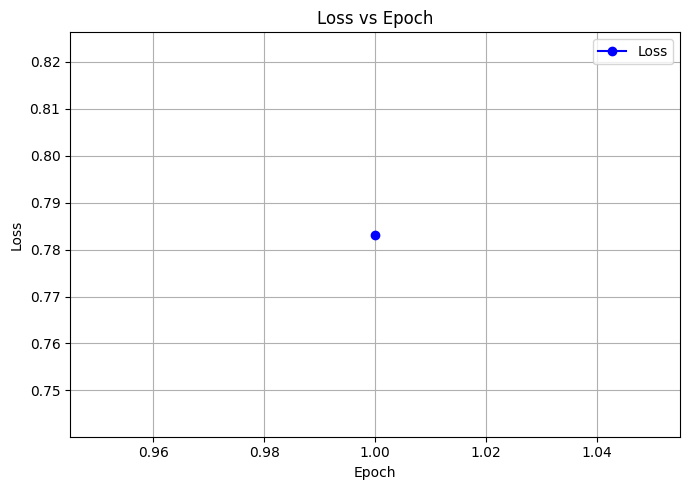

In [ ]:
import matplotlib.pyplot as plt
avg_epoch_loss = torch.tensor(avg_epoch_loss, device =  'cpu')
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(avg_epoch_loss) + 1), avg_epoch_loss, label='Loss', color='blue', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model.eval()

GeoLocationModel(
  (base_model): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
        (position_embedding): Embedding(50, 768)
      )
      (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-11): 12 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): QuickGELUActivation()
       

In [ ]:
avg_val_haversine_loss = 0.0
batch_haversine = []

model, optimizer, val_dataloader = accelerator.prepare(model, optimizer, val_dataloader)

with torch.no_grad():  # Disable gradient calculation for validation
    for images, coordinates, image_path in tqdm(val_dataloader, total=len(val_dataloader), desc=f'Validating'):
        # Forward pass
        images, coordinates = images.cuda(), coordinates.cuda()
        outputs = model(images, coordinates, image_path)
        loss_haversine = haversineLoss(outputs['pred'], coordinates).mean(dim=-1)
        batch_haversine.append(loss_haversine)
        avg_val_haversine_loss += loss_haversine

# Calculate average loss and haversine
avg_val_haversine_loss /= len(val_dataloader)

print(f'Validation Haversine Loss: {avg_val_haversine_loss:.4f}')

Validating: 100%|██████████| 313/313 [02:16<00:00,  2.29it/s]


Validation Haversine Loss: 0.7857


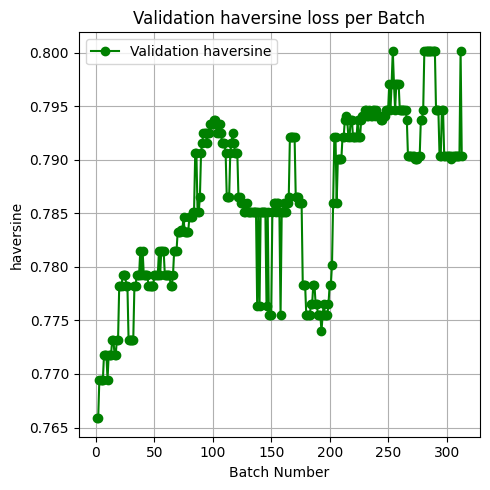

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Back from gpu
batch_haversine = torch.tensor(batch_haversine, device =  'cpu')

# Remove outliers
batch_haversine = median_filter(batch_haversine, size=100)

plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
plt.plot(range(1, len(batch_haversine) + 1), batch_haversine, label='Validation haversine', color='green', marker='o')
plt.xlabel('Batch Number')
plt.ylabel('haversine')
plt.title('Validation haversine loss per Batch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from modules.plot import plot_predictions

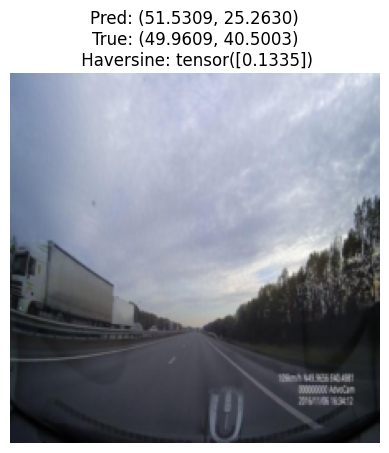

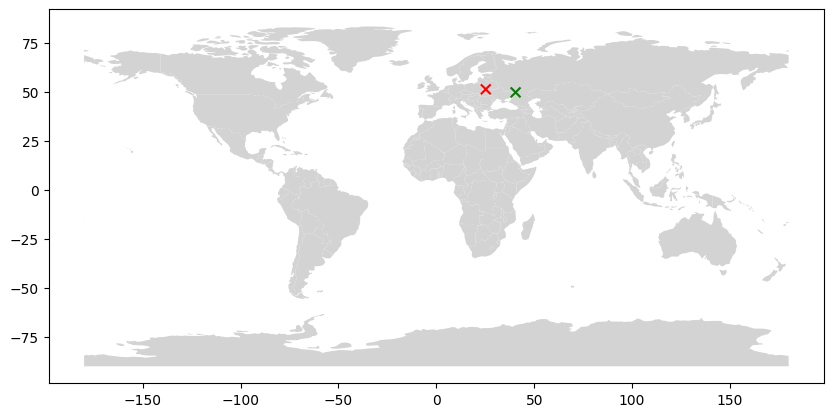

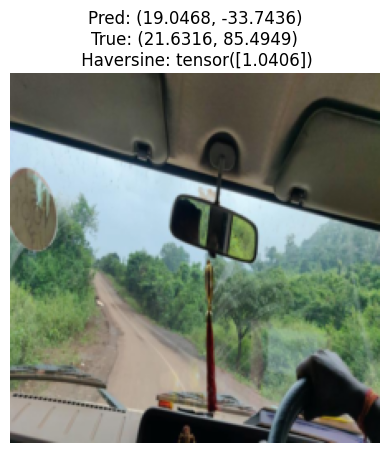

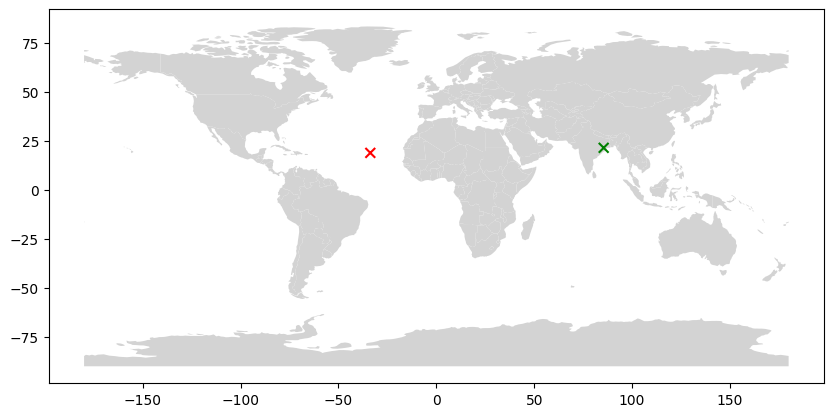

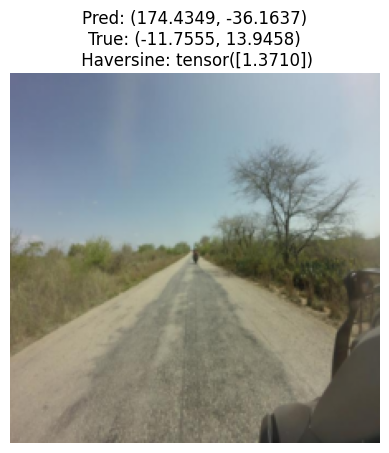

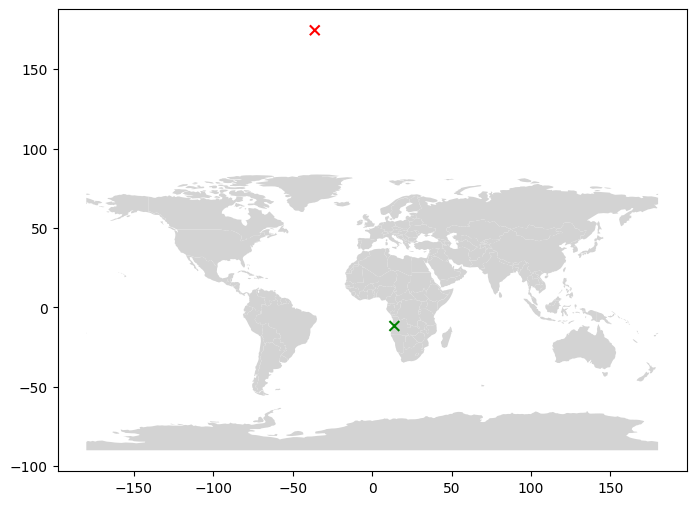

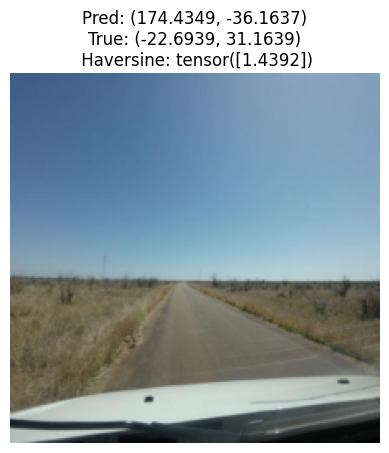

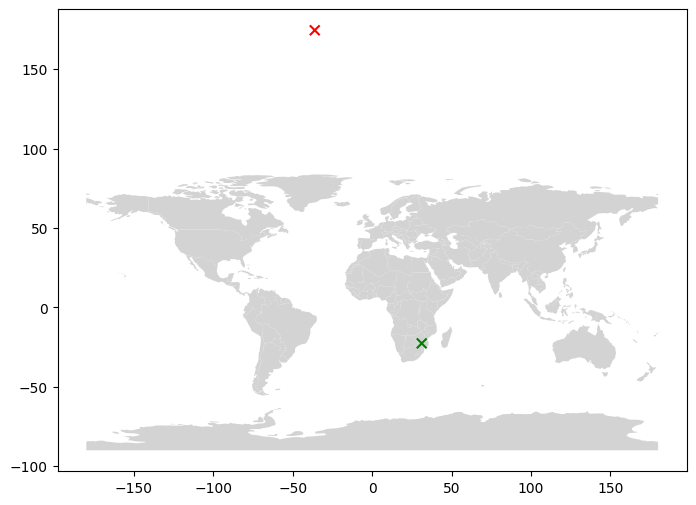

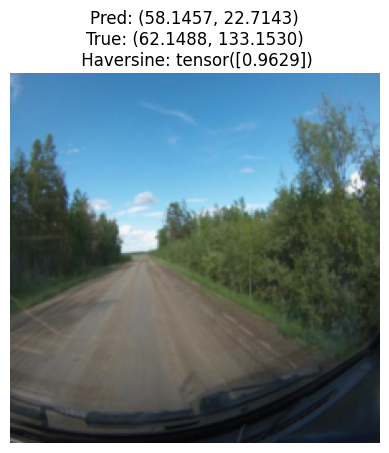

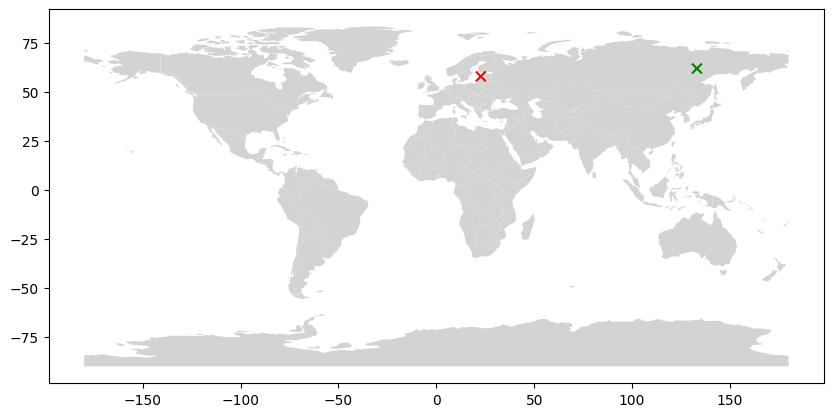

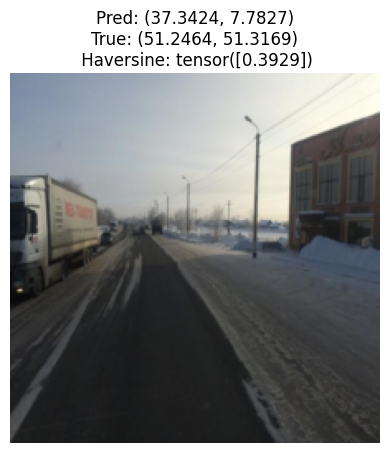

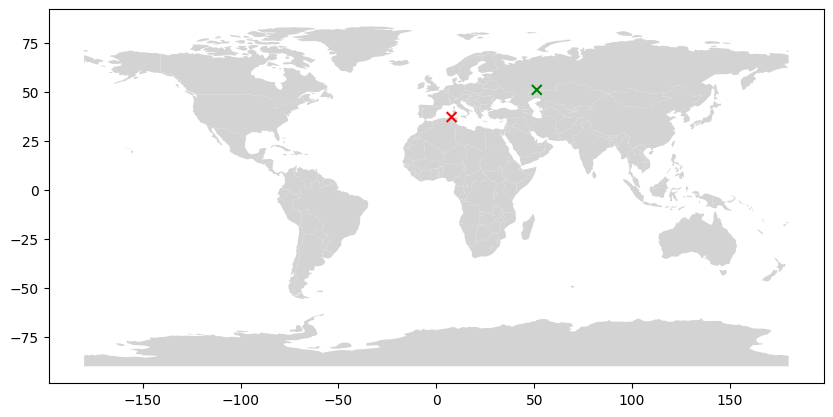

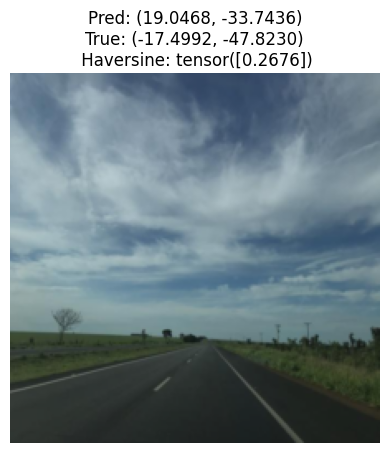

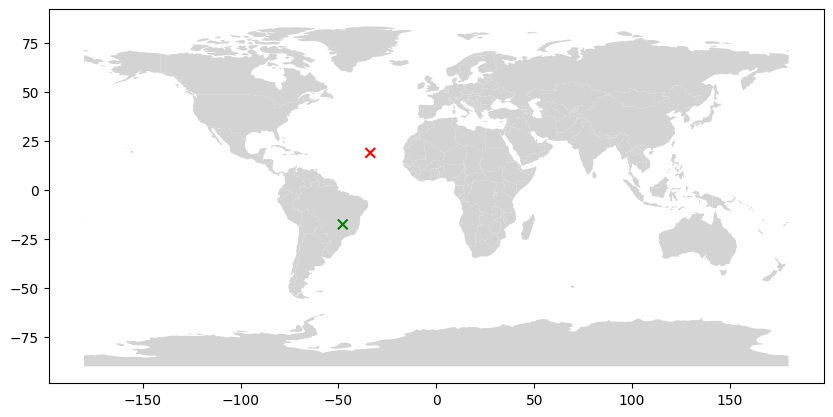

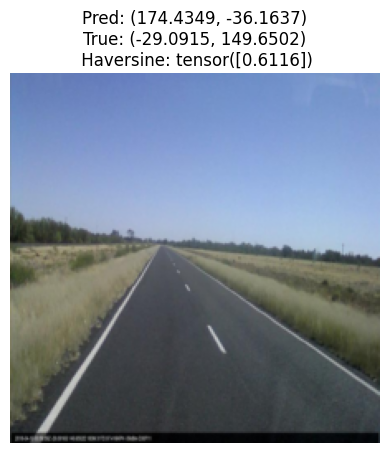

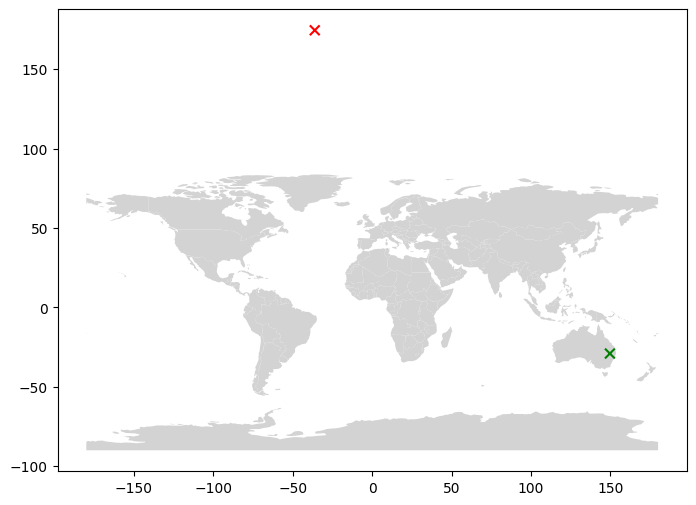

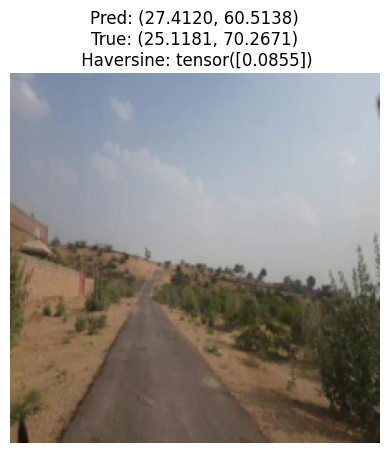

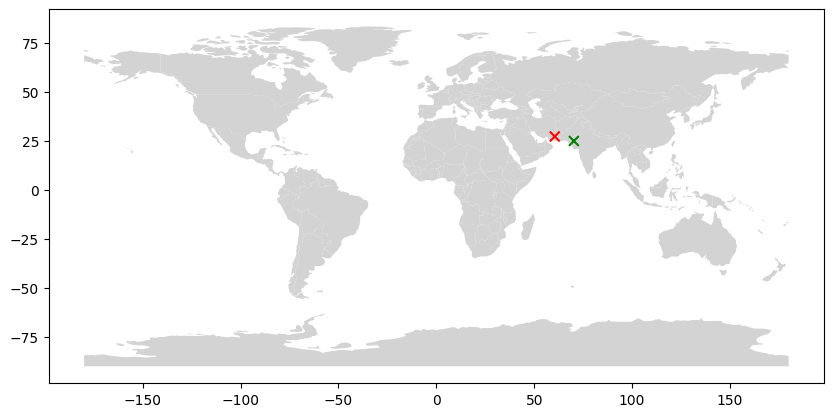

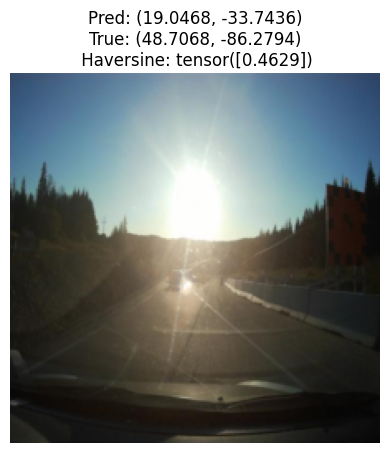

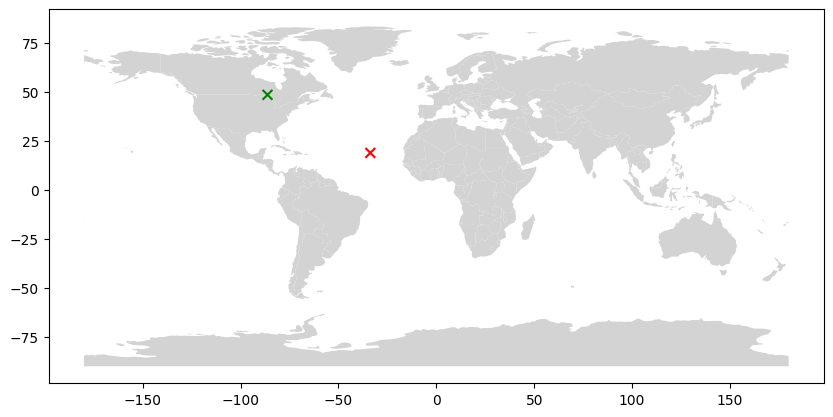

In [ ]:
plot_predictions(model, val_dataloader, num_samples=10)